# Zomato Restaurant

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.stats import zscore

from sklearn.model_selection import train_test_split

In [2]:
df1=pd.read_excel(r'C:\Users\ASUS\Downloads\Country-Code.xlsx')
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [3]:
df2 = pd.read_csv('downloads/zomato.csv', encoding='ISO-8859-1')
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df= pd.merge(df1,df2,on='Country Code',how='left')
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [5]:
df.shape

(9551, 22)

In [6]:
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [7]:
df.sample(2)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2484,1,India,309859,Pebble Street,New Delhi,"61-62, N Block, Outer Circle, Connaught Place,...",Connaught Place,"Connaught Place, New Delhi",77.220442,28.630243,...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.0,Green,Very Good,817
4084,1,India,18198179,Pappi Machhi Wala,New Delhi,"Opposite Adarsh School, Near Furniture Market,...",Kirti Nagar,"Kirti Nagar, New Delhi",77.129915,28.652278,...,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,9


In [8]:
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [10]:
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [11]:
df.count()

Country Code            9551
Country                 9551
Restaurant ID           9551
Restaurant Name         9551
City                    9551
Address                 9551
Locality                9551
Locality Verbose        9551
Longitude               9551
Latitude                9551
Cuisines                9542
Average Cost for two    9551
Currency                9551
Has Table booking       9551
Has Online delivery     9551
Is delivering now       9551
Switch to order menu    9551
Price range             9551
Aggregate rating        9551
Rating color            9551
Rating text             9551
Votes                   9551
dtype: int64

In [12]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

There are 9 null values

<Axes: >

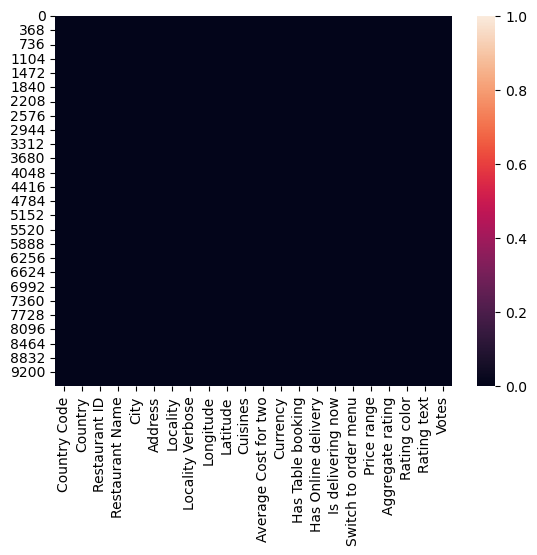

In [13]:
sns.heatmap(df.isnull())

In [14]:
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])


In [15]:
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

There are no null values.

In [16]:
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


std is very high for Average cost for 2, Longitude and Votes. Outliers would be there.
Mean is greater than median except for Longitude, Latitude, Price range anf Aggregate rating.
There is a large difference in 75% and max value in Country Code,Longitude,Latitude,Average Cost for two,Votes.

In [17]:
info_df = df.nunique().to_frame('No. of unique values')
info_df

,No. of unique values
Country Code,15
Country,15
Restaurant ID,9551
Restaurant Name,7446
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677


 'Average Cost for Two' is the target variable with 140 unique values out of 9,551 total in the dataset. This indicates a regression problem since the target variable is continuous and numerical.
'Price Range' is another target variable with four unique values (3, 4, 2, 1) out of 9,551 total in the dataset. This confirms that we are dealing with a classification problem.


In [18]:
df['Average Cost for two'].unique()

array([   850,    700,    500,    400,   1000,   2000,   2500,    800,
         3600,      0,    550,   1100,   1500,    900,   1800,    300,
         1400,    350,    450,    600,    950,   1200,    200,    100,
          150,    650,   1300,   2400,    250,   1600,   2200,    750,
         1700,   1250,   1900,   2700,   3500,   5000,   2300,   1750,
         3200,   3000,   2100,   1850,   4500,   4000,   3300,    120,
         1350,   1650,   1950,   1050,    290,     50,   1450,   2800,
          260,   3650,   4800,   1550,    720,   6500,   7000,   1150,
         2900,   2600,   4700,   3700,   3800,   4100,   4300,   2650,
         6000,   5100,   5500,   4400,   4200,   8000,   2350,     20,
            7,     30,     55,     45,     60,     80,     90,    230,
          240,    140,    170,     40,     70,     85,     75,     65,
           25, 150000,  70000, 250000, 200000, 165000, 800000, 500000,
       300000, 450000, 120000, 100000, 350000,     35,    190,    105,
      

In [19]:
df['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
70000       1
165000      1
450000      1
120000      1
4300        1
Name: Average Cost for two, Length: 140, dtype: int64

In [20]:
df['Price range'].unique()

array([3, 2, 4, 1], dtype=int64)

In [21]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [22]:
 df[df.duplicated()].shape[0]
    

0

There are o duplicate rows.

In [23]:
df.skew()

Country Code             3.043965
Restaurant ID            0.061570
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

Country Code               Axes(0.125,0.53;0.168478x0.35)
Restaurant ID           Axes(0.327174,0.53;0.168478x0.35)
Longitude               Axes(0.529348,0.53;0.168478x0.35)
Latitude                Axes(0.731522,0.53;0.168478x0.35)
Average Cost for two       Axes(0.125,0.11;0.168478x0.35)
Price range             Axes(0.327174,0.11;0.168478x0.35)
Aggregate rating        Axes(0.529348,0.11;0.168478x0.35)
Votes                   Axes(0.731522,0.11;0.168478x0.35)
dtype: object

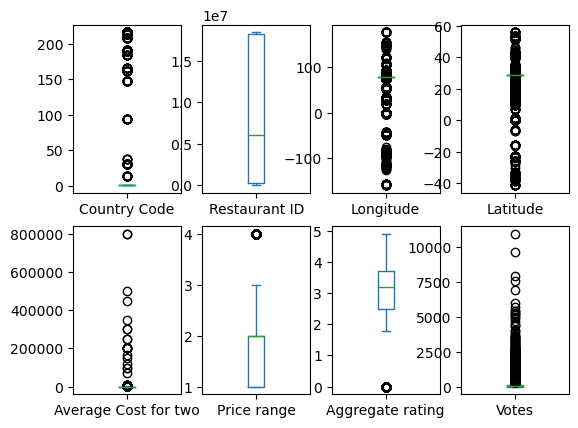

In [24]:
df.plot(kind='box',subplots=True,layout=(2,4))

<Axes: >

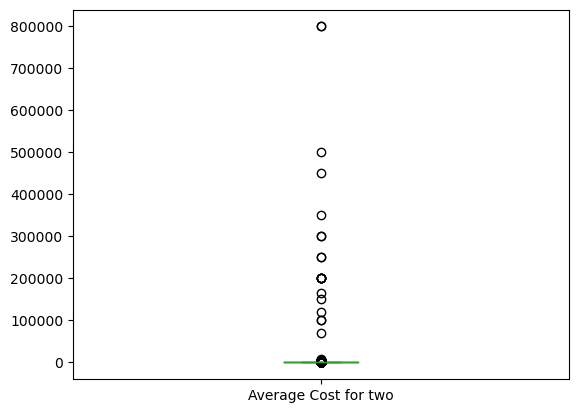

In [25]:
df['Average Cost for two'].plot.box()


Skewness of Average Cost for two : 35.47791490087126


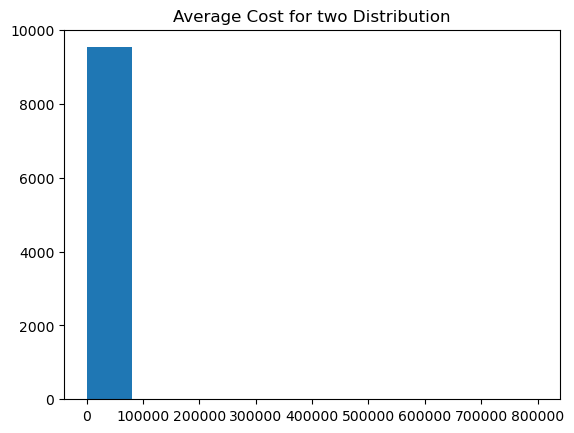

In [26]:
plt.hist(df['Average Cost for two'])
plt.title('Average Cost for two Distribution')
plt.show
print(f"Skewness of {'Average Cost for two'} : {df['Average Cost for two'].skew()}")

The distribution of 'Average Cost for two' is skewed to the right

Skewness of Price range : 0.8896175931442


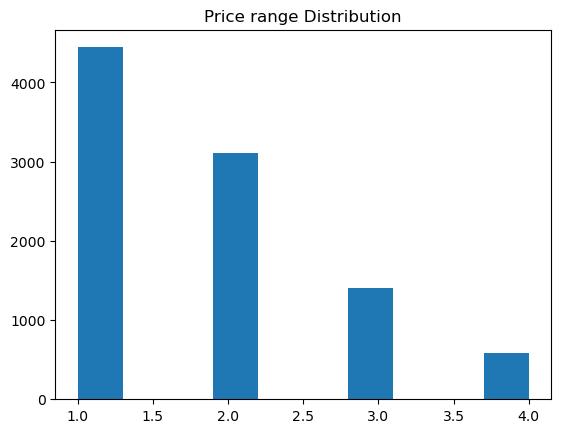

In [27]:


plt.hist(df['Price range'])
plt.title('Price range Distribution')
plt.show
print(f"Skewness of {'Price range'} : {df['Price range'].skew()}")

<Axes: >

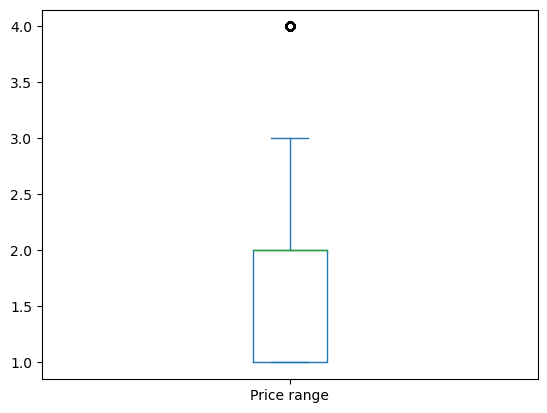

In [28]:
df['Price range'].plot.box()

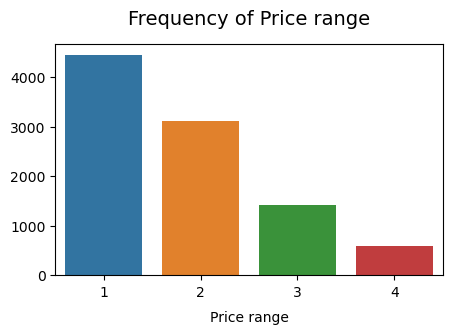

In [29]:
col = 'Price range'
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=col, data=df)

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

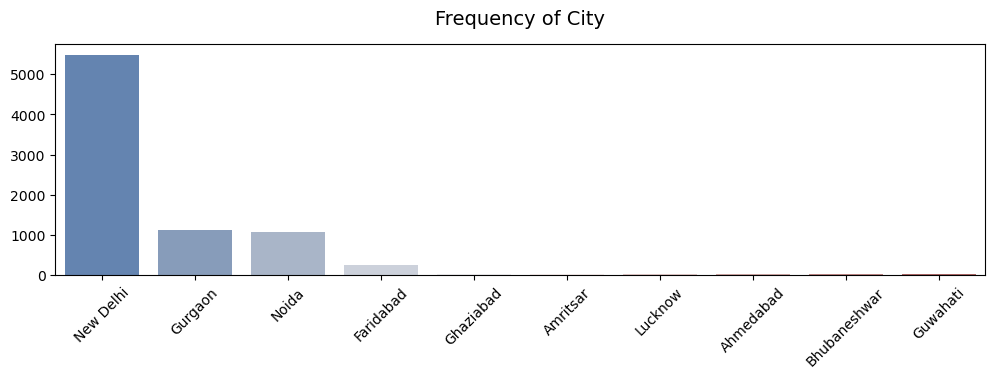

In [30]:
col = 'City'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
ax = sns.barplot(x=df_counts[:10].index, y=df_counts[:10].values, palette='vlag')


plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [31]:
# List the rest of the cities.
display(df_counts[11:])

Davenport           20
Sí£o Paulo          20
Rio de Janeiro      20
Agra                20
Brasí_lia           20
                    ..
Vineland Station     1
Yorkton              1
Bandung              1
Quezon City          1
Winchester Bay       1
Name: City, Length: 130, dtype: int64

The dataset comprises observations for 141 cities, with the majority being in New Delhi.

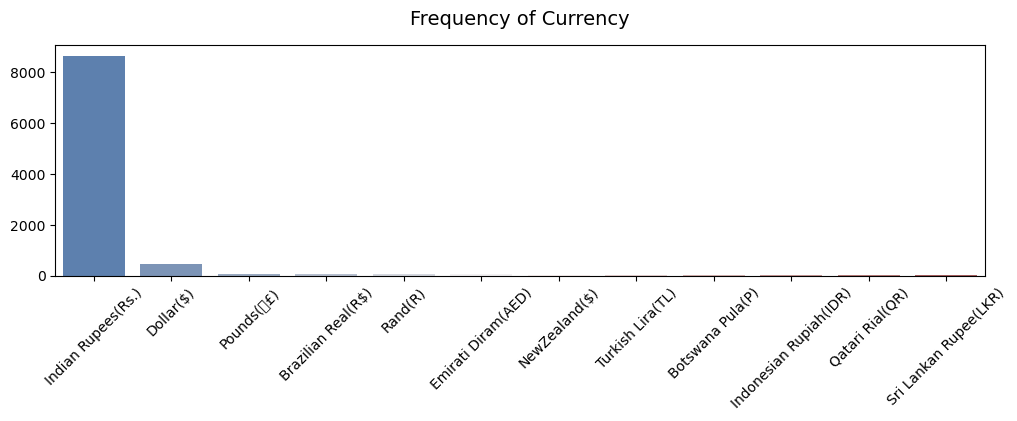

In [32]:
col = 'Currency'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')


plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The dominant currency is the Indian Rupee (Rs.).

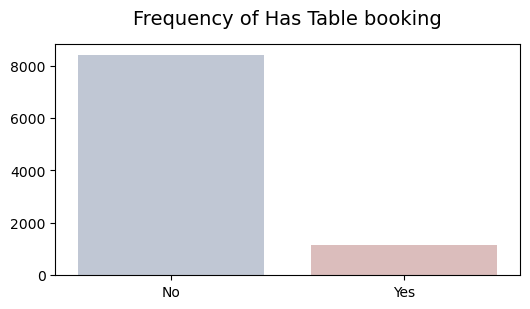

In [33]:
col = 'Has Table booking'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

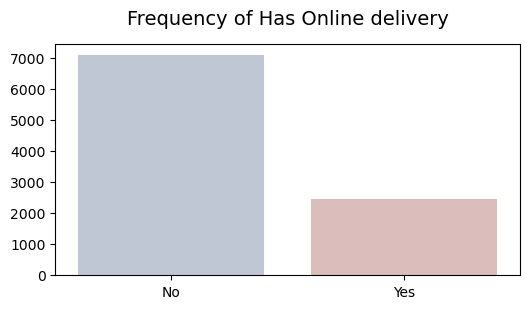

In [34]:
col = 'Has Online delivery'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

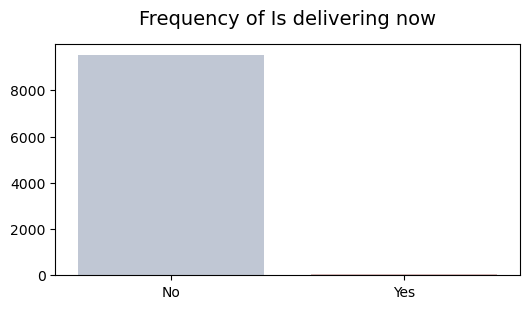

In [35]:
col = 'Is delivering now'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

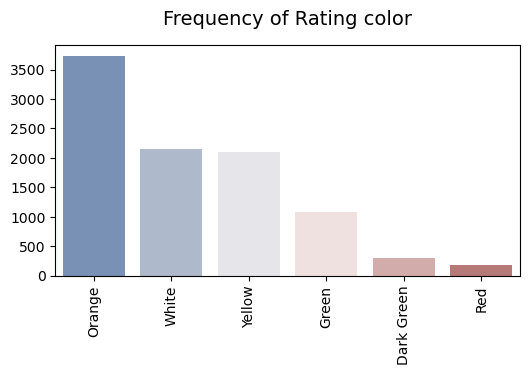

In [36]:
col = 'Rating color'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')


plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

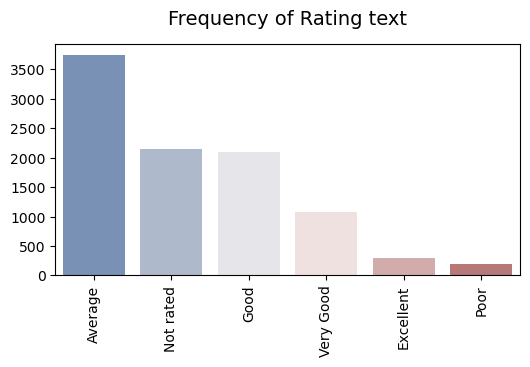

In [37]:
col = 'Rating text'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')


plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

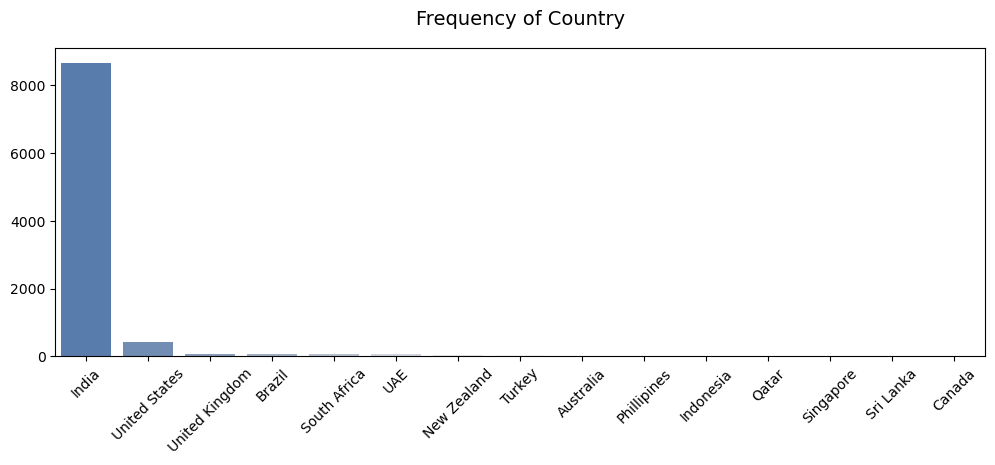

In [38]:
col = 'Country'
plt.figure(figsize=(12, 4))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
 

plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);


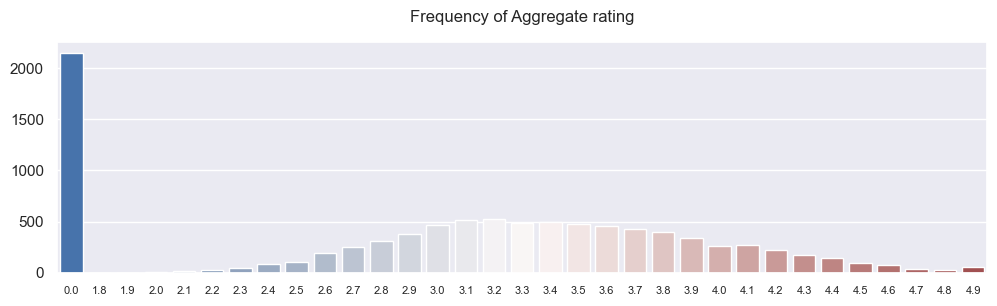

In [39]:
col = 'Aggregate rating'
sns.set(font_scale=1)
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')


plt.xticks(rotation=0, size=8)
plt.xlabel('', size=10, labelpad=6)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=12, y=1.05);

The distribution of the 'Aggregate rating' variable, representing the average rating out of 5, exhibits a nearly normal distribution with 33 unique values. Notably, there is a substantial number of zero ratings

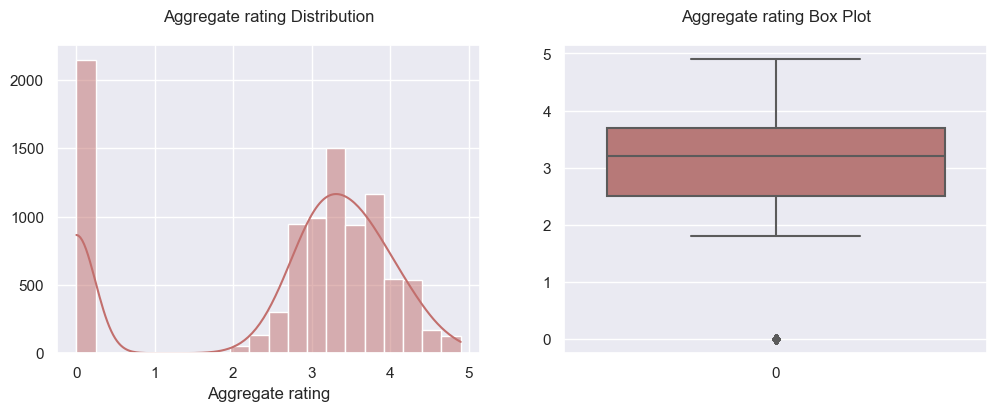

Skewness of Aggregate rating : -0.9541304733200118


In [40]:
col = 'Aggregate rating'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MaxTemp
print(f"Skewness of {col} : {df[col].skew()}")

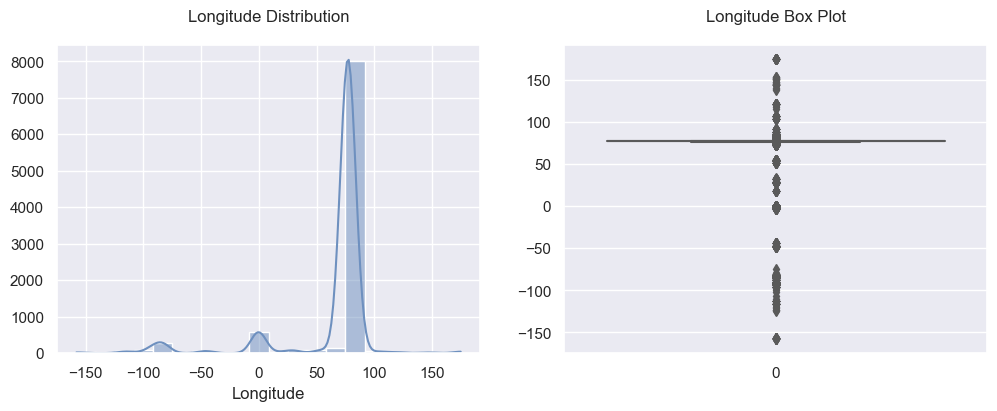

Skewness of Longitude : -2.8073278338140857


In [41]:
col = 'Longitude'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MinTemp
print(f"Skewness of {col} : {df[col].skew()}")

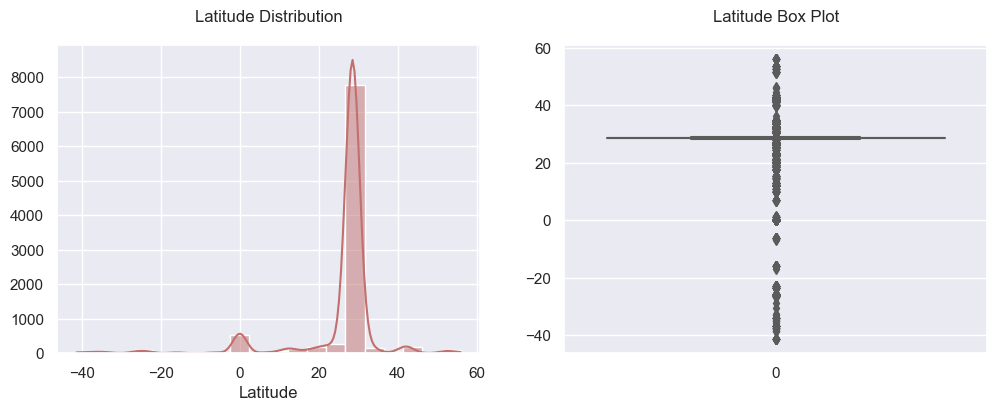

Skewness of Latitude : -3.0816353506085696


In [42]:
col = 'Latitude'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MaxTemp
print(f"Skewness of {col} : {df[col].skew()}")

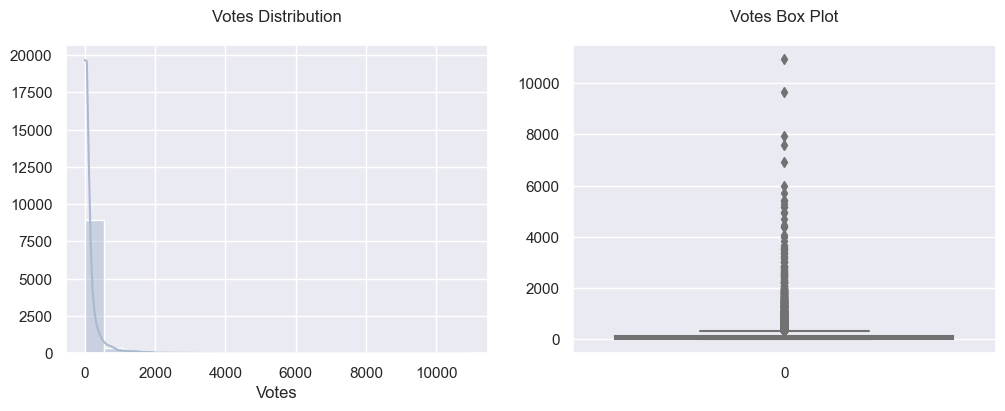

Skewness of Votes : 8.807636687709472


In [43]:
col = 'Votes'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Evaporation
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Votes' is skewed to the right. A Box plot indicates the presence of outliers in this variable.

In [44]:
def boxplot_by_category(col, category_col, xlabel, cat_label, figsize, palette, xscale=''):
    plt.figure(figsize=figsize)
    sns.set_palette(palette)
    sns.boxplot(data=df, x=col, y=category_col)
    plt.ylabel(cat_label)
    plt.xlabel(xlabel)
    if xscale != '':
        plt.xscale(xscale)
    plt.title(f"BoxPlot of {col} vs. {cat_label}")
    plt.show()

In [45]:
def plot_scatter_target_r_according_to(col, category_col, xlabel, title, palette):
    '''Draw a scatter plot comparing <col> with Rainfall variable and RainTomorrow.'''
    plt.figure(figsize=(8, 4))
    sns.set(font_scale=1)  

    # Plot scatterplot
    sns.scatterplot(x=col, y='Average Cost for two', hue=category_col, data=df, palette=palette)

    # visual presentation
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1)).set_title(category_col)
    plt.xlabel(xlabel)
    plt.ylabel('Average Cost for two')
    plt.title(f'{title} vs. Average Cost for two according to {category_col}')
    plt.show()

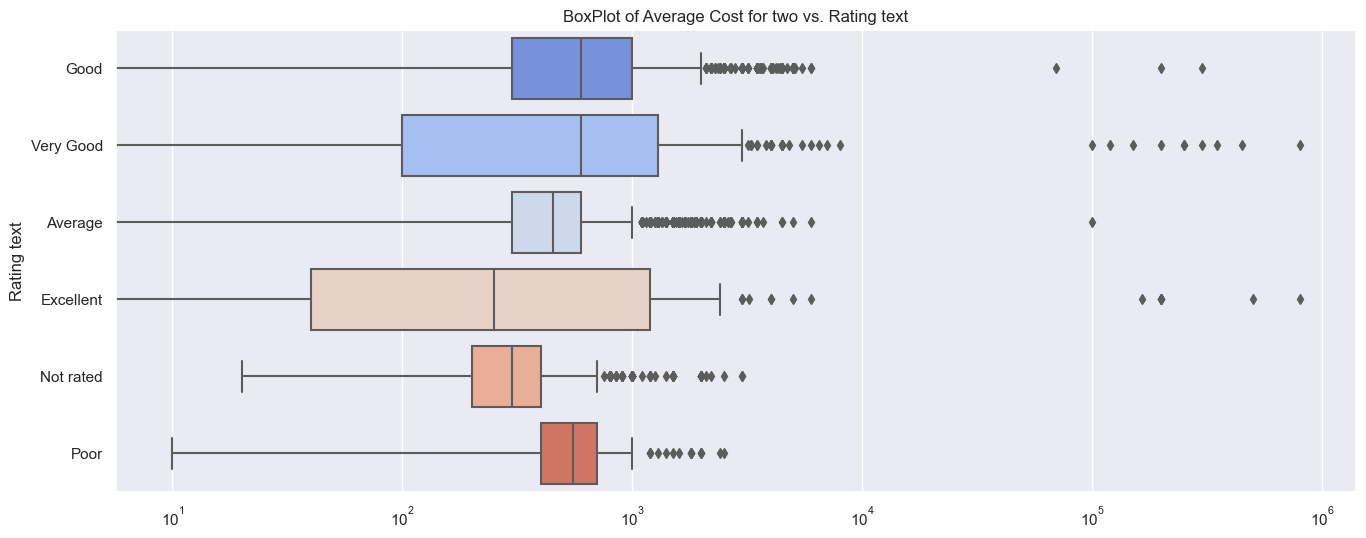

In [46]:
# Visualizing and comparing each independent variable with target
# Columns Average Cost for two 
col = 'Average Cost for two'
category_col= 'Rating text'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,6), palette='coolwarm', xscale='log')

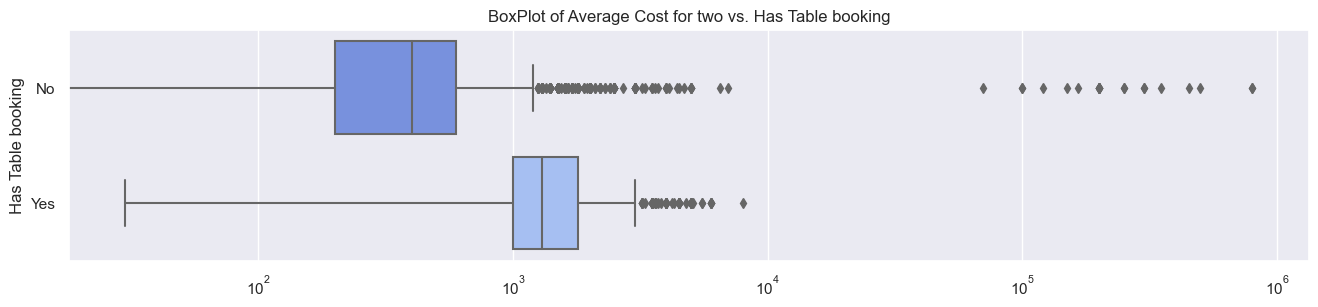

In [47]:
# Visualizing and comparing each independent variable with target
# Columns Average Cost for two 
col = 'Average Cost for two'
category_col= 'Has Table booking'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm', xscale='log')

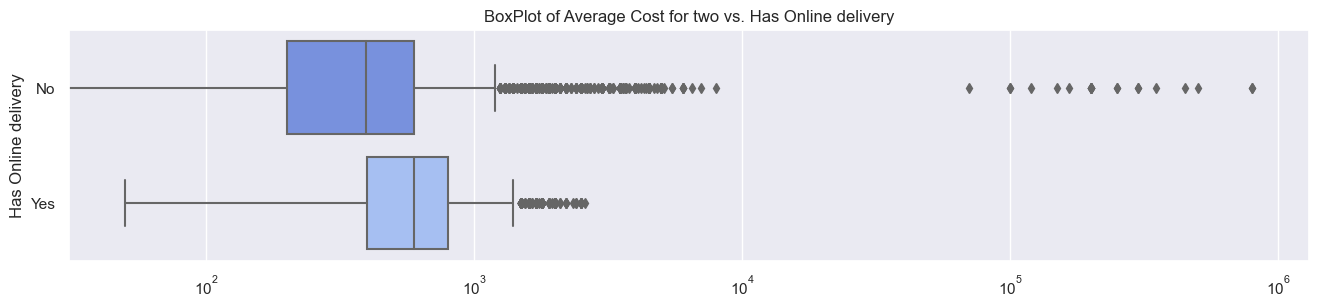

In [48]:
# Visualizing and comparing each independent variable with target
# Columns Average Cost for two 
col = 'Average Cost for two'
category_col= 'Has Online delivery'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm', xscale='log')

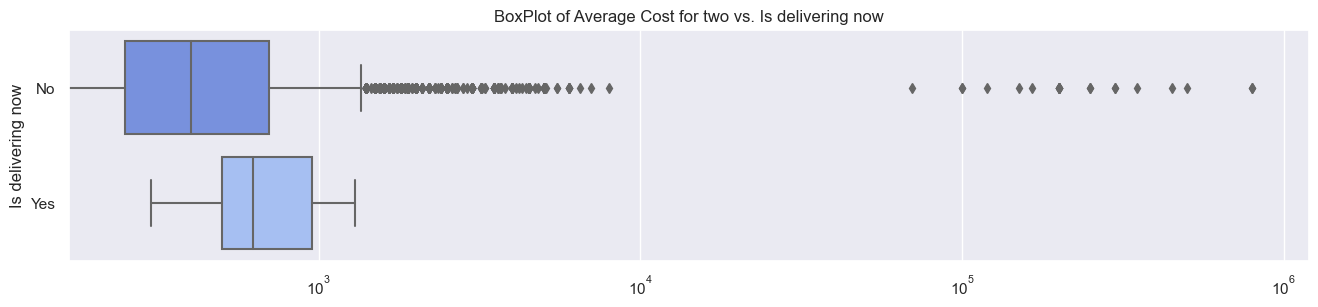

In [49]:
# Visualizing and comparing each independent variable with target
# Columns Average Cost for two 
col = 'Average Cost for two'
category_col= 'Is delivering now'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm', xscale='log')

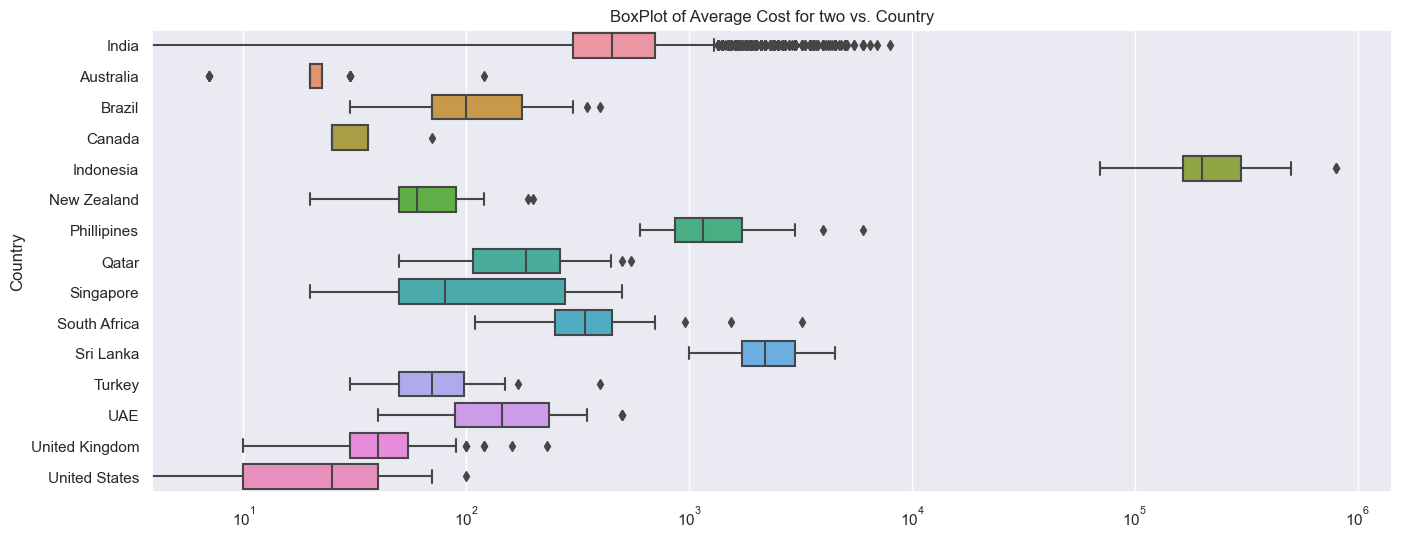

In [50]:
# Visualizing and comparing each independent variable with target
# Columns Average Cost for two 
col = 'Average Cost for two'
category_col= 'Country'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,6), palette='coolwarm', xscale='log')

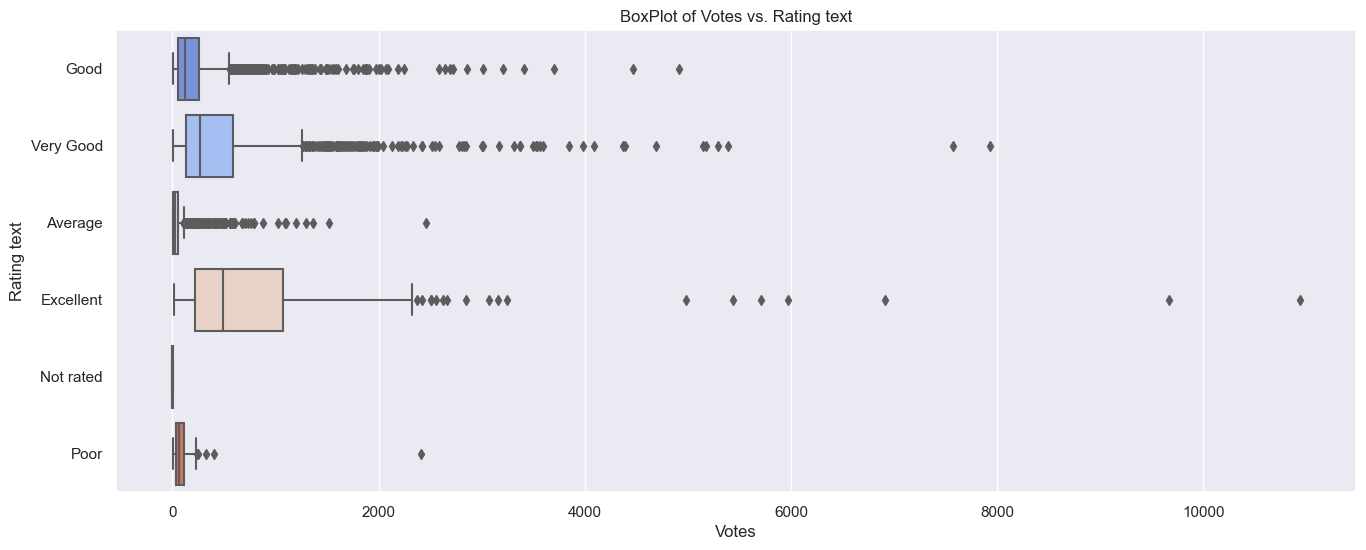

In [51]:
# Visualizing and comparing each independent variable with target
# Columns Votes 
col = 'Votes'
category_col= 'Rating text'

boxplot_by_category(col, category_col,  xlabel='Votes', cat_label=category_col, figsize=(16,6), palette='coolwarm')

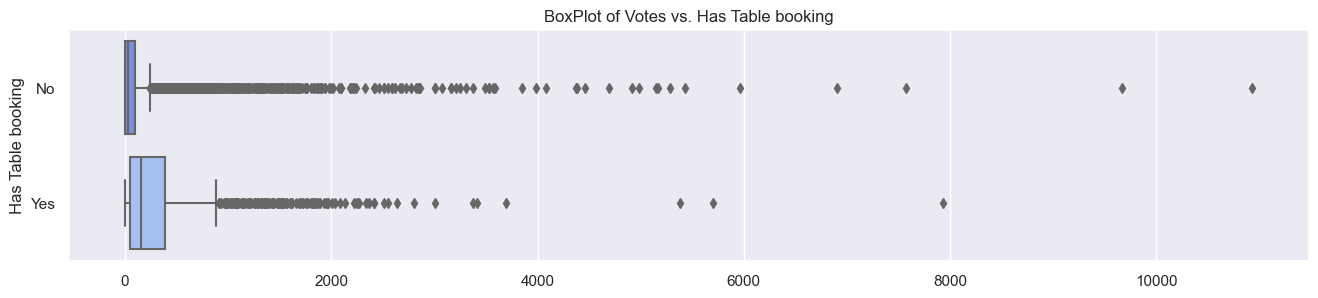

In [52]:
# Visualizing and comparing each independent variable with target
# Columns Votes
col = 'Votes'
category_col= 'Has Table booking'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm')

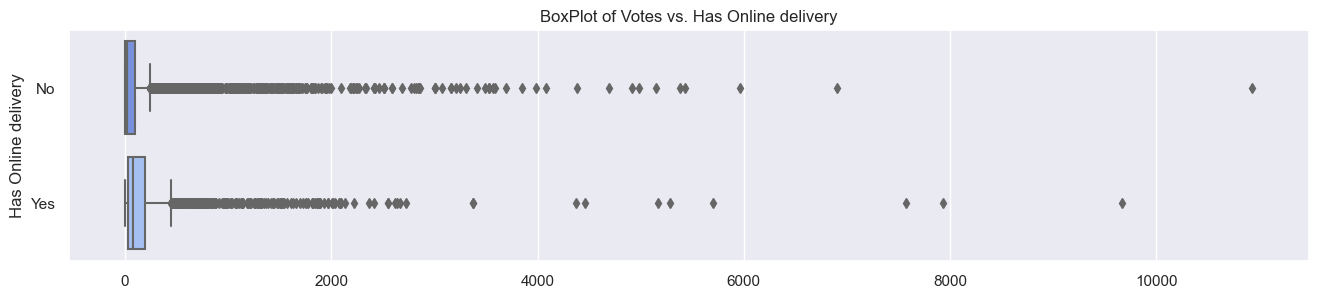

In [53]:
# Visualizing and comparing each independent variable with target
# Columns Votes 
col = 'Votes'
category_col= 'Has Online delivery'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm')

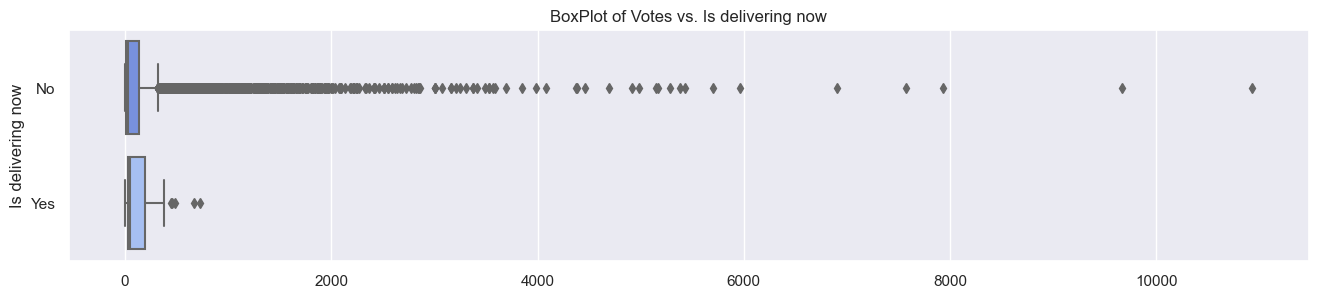

In [54]:
# Visualizing and comparing each independent variable with target
# Columns Votes
col = 'Votes'
category_col= 'Is delivering now'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm')

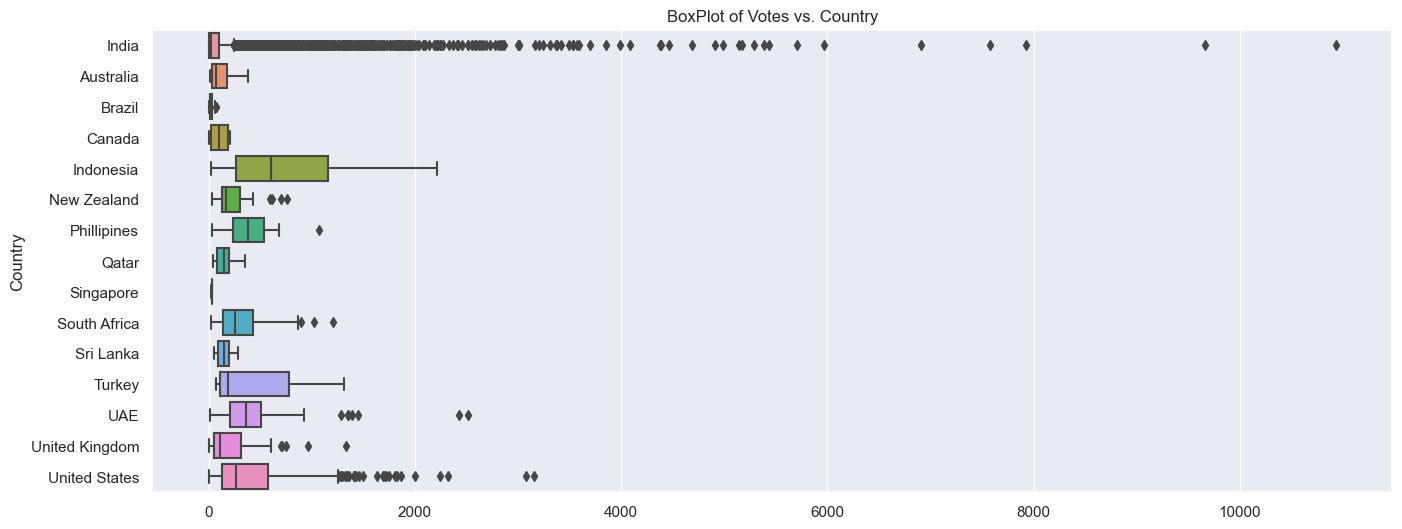

In [55]:
# Visualizing and comparing each independent variable with target
# Columns Votes 
col = 'Votes'
category_col= 'Country'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,6), palette='coolwarm')

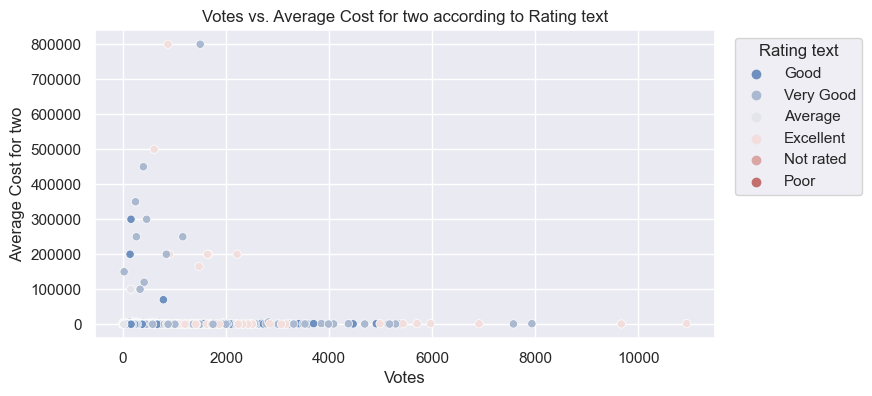

In [56]:
#comparing average cost with votes
col = 'Votes'
plot_scatter_target_r_according_to(col, category_col='Rating text', xlabel=col, title=col, palette='vlag')

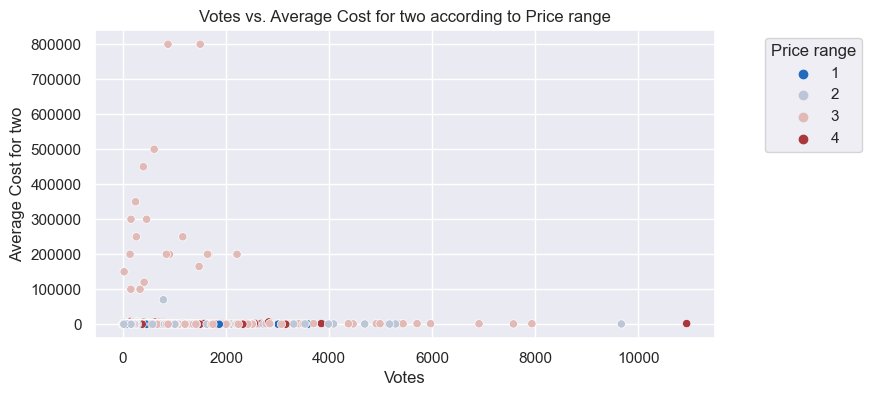

In [57]:
col = 'Votes'
plot_scatter_target_r_according_to(col, category_col='Price range', xlabel=col, title=col, palette='vlag')

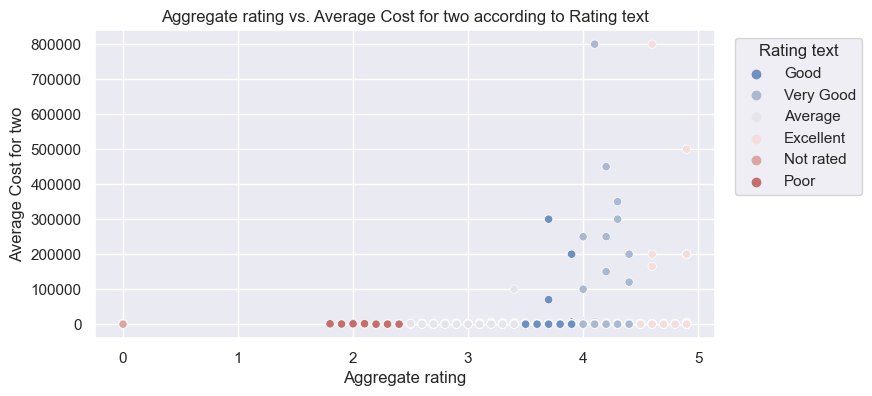

In [58]:
col = 'Aggregate rating'
plot_scatter_target_r_according_to(col, category_col='Rating text', xlabel=col, title=col, palette='vlag')

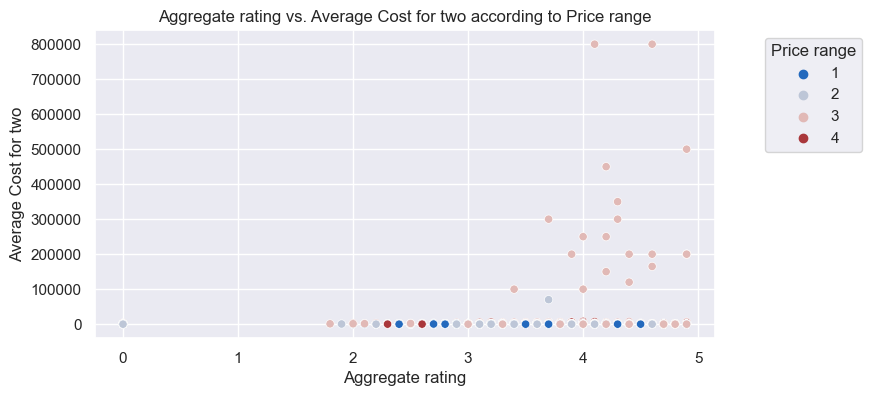

In [59]:
col = 'Aggregate rating'
plot_scatter_target_r_according_to(col, category_col='Price range', xlabel=col, title=col, palette='vlag')

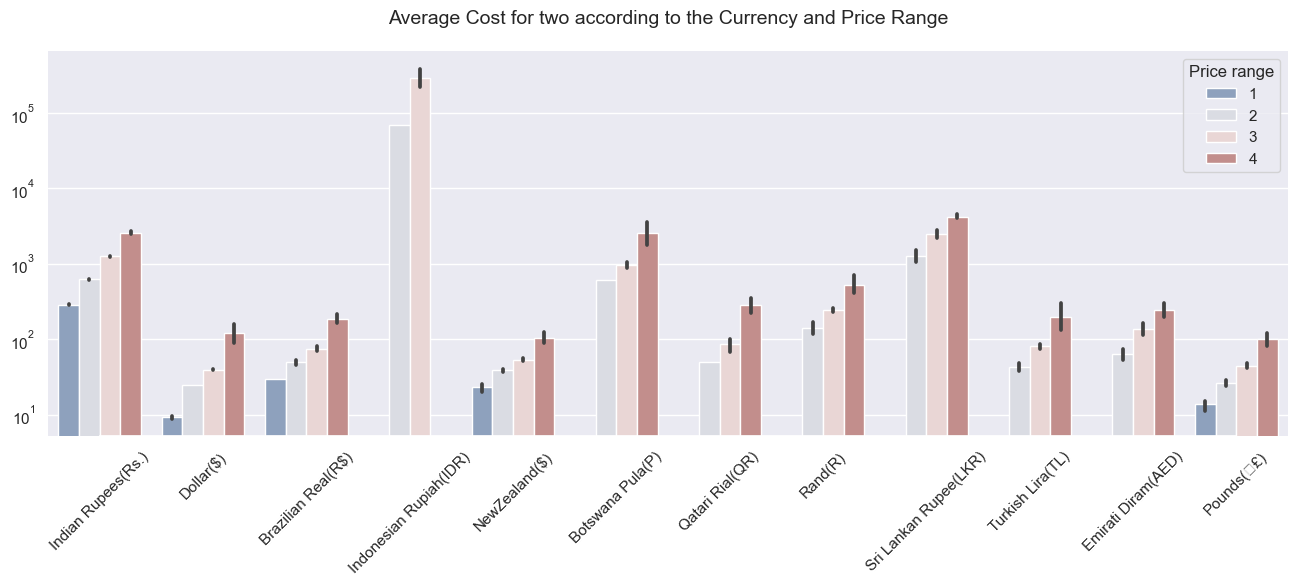

In [60]:
plt.figure(figsize=(16,5))
sns.barplot(x='Currency', y='Average Cost for two', hue='Price range', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Average Cost for two according to the Currency and Price Range', size=14, y=1.05)
plt.show()

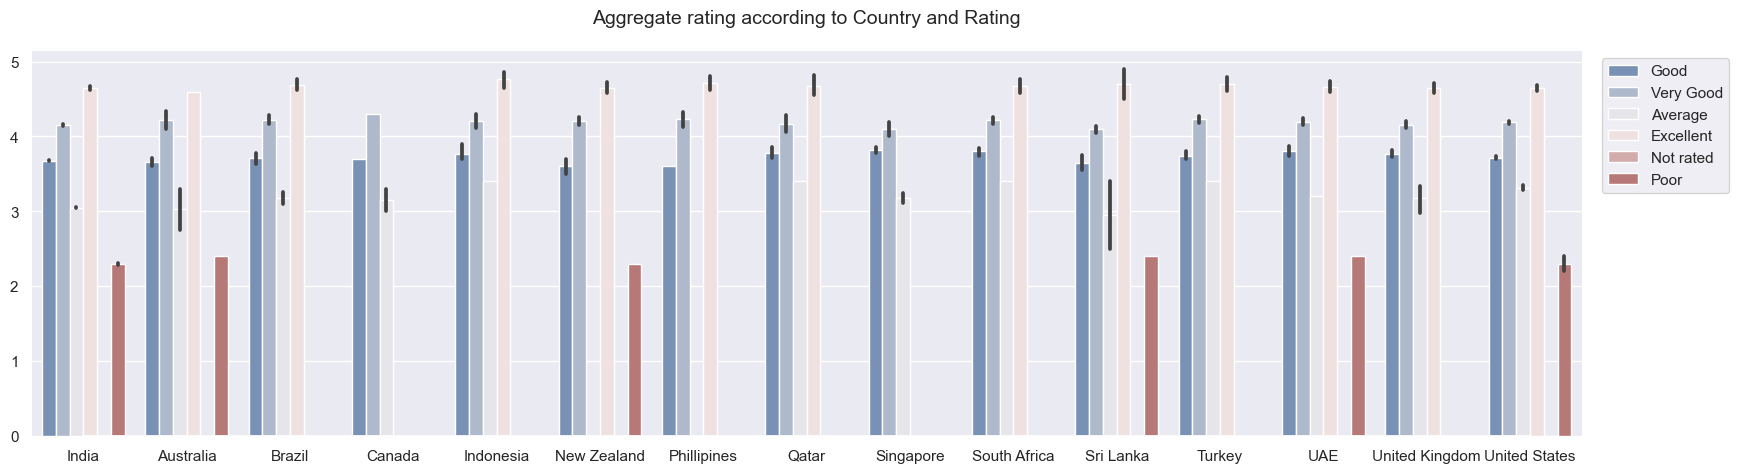

In [61]:
plt.figure(figsize=(20,5))
sns.barplot(x='Country', y='Aggregate rating', hue='Rating text', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1)).set_title('')
plt.title('Aggregate rating according to Country and Rating', size=14, y=1.05)
plt.show()

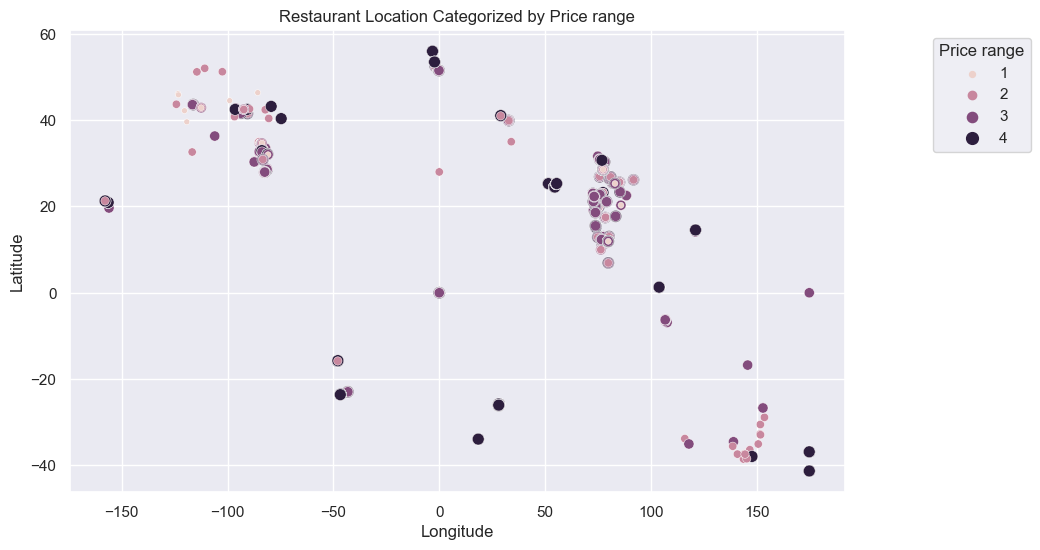

In [62]:
plt.figure(figsize=(10, 6))

# Map simulation with scatterplot
sns.scatterplot(x='Longitude', y='Latitude', hue='Price range', size='Price range', data=df)

# visual presentation
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1)).set_title('Price range')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Location Categorized by Price range')
plt.show()

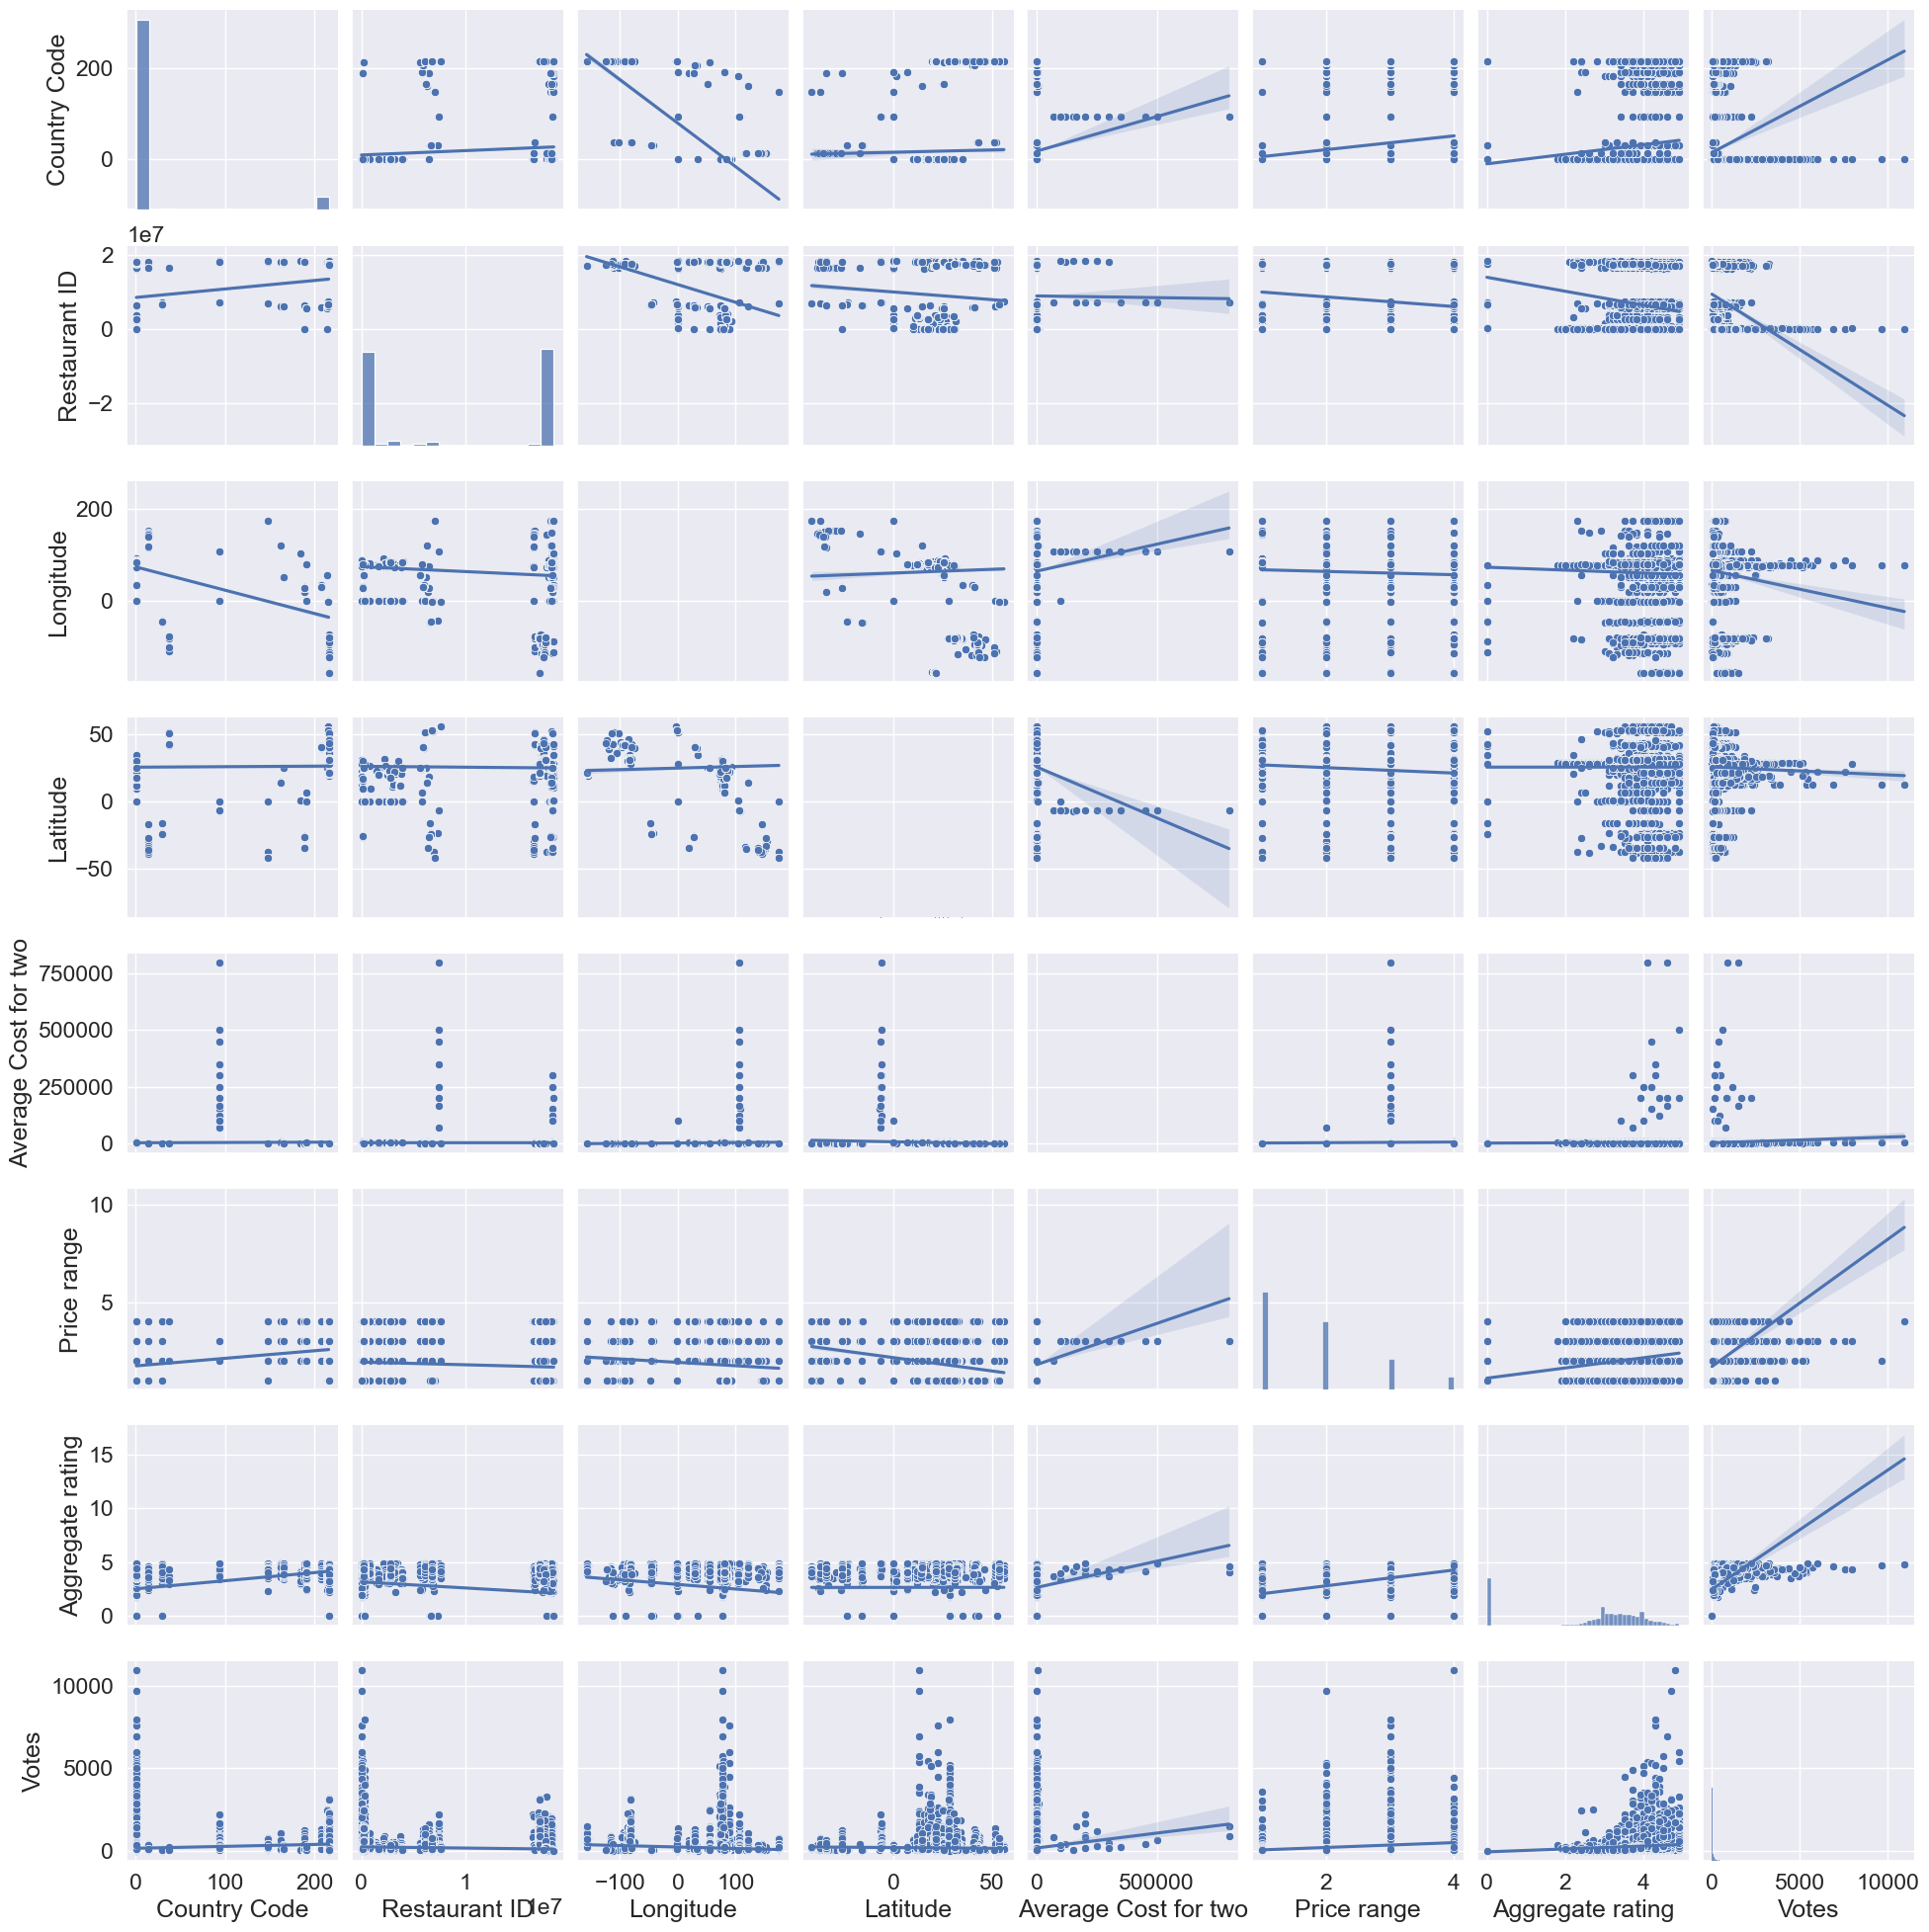

In [63]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, palette = "coolwarm")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

We observe a moderate positive correlation between the 'Average Cost for Two' variable and the 'Votes,' 'Price Range,' and 'Country Code' variables. Conversely, the 'Price Range' variable shows a weak positive correlation with the 'Votes,' 'Average Cost for Two,' and 'Country Code' variables.

In [64]:
cor = df.corr()
cor

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Country Code,1.000000,0.148471,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Restaurant ID,0.148471,1.000000,-0.226081,-0.052081,-0.001693,-0.134540,-0.326212,-0.147023
Longitude,-0.698299,-0.226081,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,0.019792,-0.052081,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,0.043225,-0.001693,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,0.243327,-0.134540,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.282189,-0.326212,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,0.154530,-0.147023,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


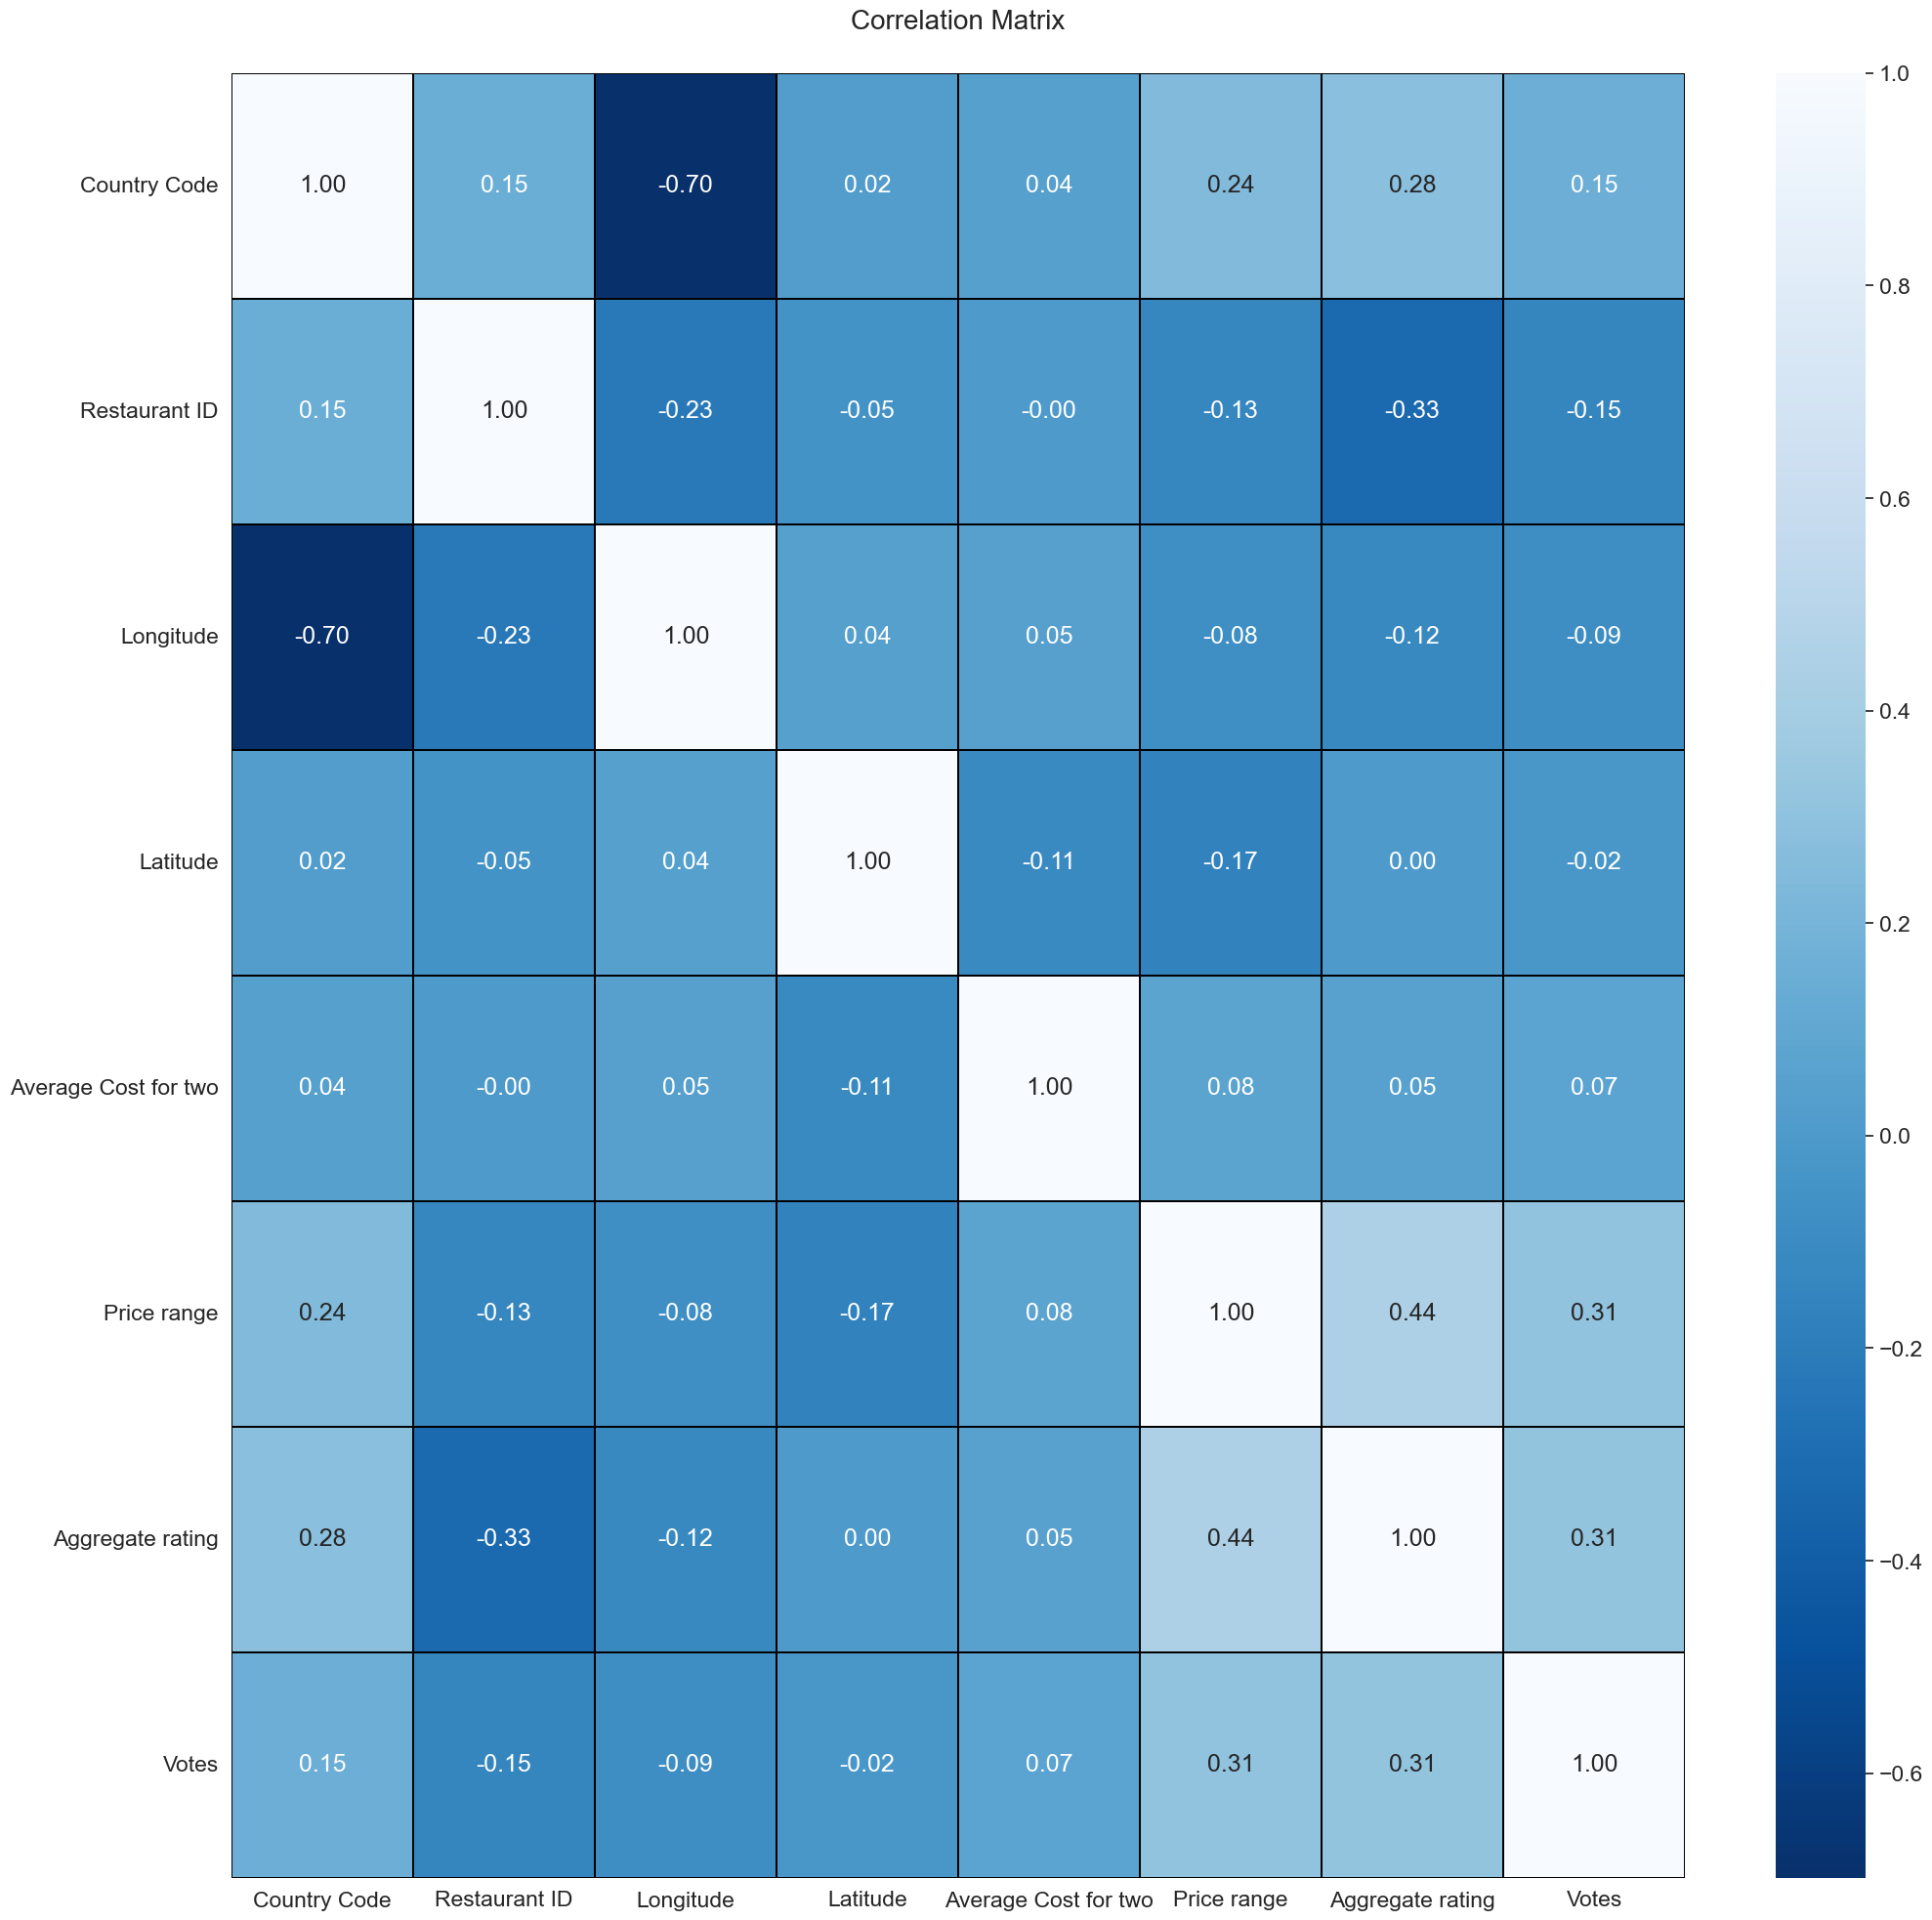

In [65]:
plt.figure(figsize=(24, 24))
sns.set(font_scale=1.5)

sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

The heatmap displays both positive and negative correlations.
The variable 'Average Cost for Two' exhibits a weak correlation with all other variables.
The 'Price Range' variable shows a moderate positive correlation with 'Aggregate Rating' (+0.44), 'Votes' (+0.31), and 'Country Code' (+0.24).
Additionally, 'Country Code' demonstrates a moderate positive correlation with 'Longitude'.

'Restaurant Name' Column: Although 'Restaurant Name' exhibits high cardinality, it potentially influences both target variables. For instance, it might indicate whether the restaurant is associated with a well-known brand. Frequency-Based Encoding will be applied to this column.



Locality' and 'Locality Verbose' Columns: From the previous analysis, it is evident that both features provide very similar information. Therefore, 'Locality Verbose' will be dropped, and Frequency-Based Encoding will be applied to 'Locality' to handle its high cardinality.

Cuisines' Variable: This variable has a unique characteristic where each row can contain multiple cuisine categories. To address this, binary columns will be created for each cuisine category, and the categories will be aggregated to reduce the number of unique values. This approach aims to make the variable more manageable.



In [66]:
#Frequency-Based Encoding replace each category with its frequency or percentage of occurrences in the dataset.

In [67]:
# Calculate the frequency of each category
frequency_map = df['Restaurant Name'].value_counts(normalize=True).to_dict()

# Create a new column with the frequency-based encoding
df['RestaurantName_enc'] = df['Restaurant Name'].map(frequency_map)

# Display the result
print(df[['RestaurantName_enc', 'Restaurant Name']].head())
print(f"\nCounts for Restaurant Name Encoded feature:\n{df['RestaurantName_enc'].value_counts()}\n")
print(f"Unique values in Restaurant Name: {df['Restaurant Name'].nunique()}")
print(f"Unique values in Restaurant Name Encoded: {df['RestaurantName_enc'].nunique()}")

   RestaurantName_enc                        Restaurant Name
0            0.000105                             Jahanpanah
1            0.000105                    Rangrezz Restaurant
2            0.000105                Time2Eat - Mama Chicken
3            0.000105  Chokho Jeeman Marwari Jain Bhojanalya
4            0.000105                         Pinch Of Spice

Counts for Restaurant Name Encoded feature:
0.000105    6712
0.000209     936
0.000314     324
0.000419     184
0.000524     140
0.000628     108
0.000733      91
0.008690      83
0.008271      79
0.001989      76
0.001885      72
0.002303      66
0.006596      63
0.000838      56
0.001466      56
0.000942      54
0.005340      51
0.005026      48
0.002094      40
0.001361      39
0.001256      36
0.003560      34
0.001152      33
0.001675      32
0.003141      30
0.003036      29
0.002932      28
0.002722      26
0.001571      15
0.001047      10
Name: RestaurantName_enc, dtype: int64

Unique values in Restaurant Name: 7446


The Frequency-Based Encoding of the 'Restaurant Name' has successfully reduced the cardinality of this feature from 7,437 unique values to 30. Subsequently, unnecessary columns will be dropped.

In [68]:
cols_to_drop = ['Restaurant Name']

In [69]:
frequency_map

{'Cafe Coffee Day': 0.008690189508951942,
 "Domino's Pizza": 0.008271385195267511,
 'Subway': 0.006596167940529788,
 'Green Chick Chop': 0.005339754999476495,
 "McDonald's": 0.005025651764213172,
 'Keventers': 0.003559836666317663,
 'Pizza Hut': 0.0031410323526332323,
 'Giani': 0.0030363312742121245,
 'Baskin Robbins': 0.002931630195791017,
 'Barbeque Nation': 0.0027222280389488014,
 "Dunkin' Donuts": 0.00230342372526437,
 "Giani's": 0.00230342372526437,
 'Barista': 0.00230342372526437,
 'Costa Coffee': 0.0020940215684221546,
 'Pind Balluchi': 0.0020940215684221546,
 'Sagar Ratna': 0.001989320490001047,
 'Twenty Four Seven': 0.001989320490001047,
 'Pizza Hut Delivery': 0.001989320490001047,
 'Wah Ji Wah': 0.001989320490001047,
 'KFC': 0.0018846194115799393,
 'Starbucks': 0.0018846194115799393,
 'Republic of Chicken': 0.0018846194115799393,
 'Chaayos': 0.0018846194115799393,
 'Burger King': 0.0016752172547377239,
 "Haldiram's": 0.0016752172547377239,
 'Shree Rathnam': 0.0015705161763166

'Locality' and 'Locality Verbose' Columns: From the previous analysis, it is evident that both features provide very similar information. Therefore, 'Locality Verbose' will be dropped, and Frequency-Based Encoding will be applied to 'Locality' to handle its high cardinality.

In [70]:
# Encoding 'Locality'
# Calculate the frequency of each category
frequency_map_loc = df['Locality'].value_counts(normalize=True).to_dict()

# Create a new column with the frequency-based encoding
df['Locality_enc'] = df['Locality'].map(frequency_map_loc)

# Display the result
print(df[['Locality_enc', 'Locality']].head())
print(f"\nCounts for Restaurant Name Encoded feature:\n{df['Locality_enc'].value_counts()}\n")
print(f"Unique values in Restaurant Name: {df['Locality'].nunique()}")
print(f"Unique values in Restaurant Name Encoded: {df['Locality_enc'].nunique()}")

   Locality_enc     Locality
0      0.000314   Agra Cantt
1      0.000314   Agra Cantt
2      0.000314   Agra Cantt
3      0.004397  Civil Lines
4      0.004397  Civil Lines

Counts for Restaurant Name Encoded feature:
0.000105    551
0.000209    346
0.000314    309
0.006282    240
0.000524    210
           ... 
0.002303     44
0.003665     35
0.003560     34
0.001152     33
0.003036     29
Name: Locality_enc, Length: 82, dtype: int64

Unique values in Restaurant Name: 1208
Unique values in Restaurant Name Encoded: 82


In [71]:
cols_to_drop.append('Locality Verbose')
cols_to_drop.append('Locality')

In [72]:
df.drop(['Restaurant ID', 'Address', 'Switch to order menu' ], axis=1, inplace=True)
display(df.sample(5))

,Country Code,Country,Restaurant Name,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,RestaurantName_enc,Locality_enc
5855,1,India,Sahara Restaurant,New Delhi,Qutab Institutional Area,"Qutab Institutional Area, New Delhi",77.186339,28.541891,"North Indian, Mughlai",400,...,No,No,No,1,0.0,White,Not rated,3,0.000105,0.002408
6708,1,India,Meal A Deal,New Delhi,South Extension 2,"South Extension 2, New Delhi",77.219512,28.564208,"North Indian, Chinese",400,...,No,No,No,1,2.8,Orange,Average,13,0.000105,0.004293
7436,1,India,Pirates of Grill,Noida,"DLF Mall of India, Sector 18, Noida","DLF Mall of India, Sector 18, Noida, Noida",77.320979,28.566463,"North Indian, Continental, Mughlai, Asian",1800,...,No,No,No,3,3.9,Yellow,Good,749,0.000419,0.003246
631,1,India,Made In Punjab,Gurgaon,"Cyber Hub, DLF Cyber City","Cyber Hub, DLF Cyber City, Gurgaon",77.088598,28.495110,"North Indian, Mughlai",1500,...,Yes,No,No,3,4.0,Green,Very Good,1595,0.000209,0.004293
8991,214,UAE,Indian By Nature,Abu Dhabi,Najda,"Najda, Abu Dhabi",54.373250,24.489591,Indian,80,...,Yes,Yes,No,3,4.3,Green,Very Good,180,0.000105,0.000314


In [73]:
#Encoding

In [74]:
# Listing the unique values to encode 
features = ['Has Table booking', 'Has Online delivery', 'Is delivering now',]
for col in features:
    print(f"Unique values for {col}: {df[col].unique()}")
    
    # Encoding the YES/NO categorical values
    df[col] = df[col].map({'No': 0, 'Yes': 1})
    
    # Listing the encoded values to encode 
    print(f"Encoded values for {col}: {df[col].unique()}\n")

Unique values for Has Table booking: ['No' 'Yes']
Encoded values for Has Table booking: [0 1]

Unique values for Has Online delivery: ['No' 'Yes']
Encoded values for Has Online delivery: [0 1]

Unique values for Is delivering now: ['No' 'Yes']
Encoded values for Is delivering now: [0 1]



In [75]:
# Add 'Country' and 'Rating color' columns in the list of columns to drop
cols_to_drop.append('Country')
cols_to_drop.append('Rating color')

encoding_col = [ 'City', 'Currency', 'Rating text']
encoding_col

['City', 'Currency', 'Rating text']

In [76]:
from sklearn.preprocessing import LabelEncoder

category_mappings = {}

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
for col in encoding_col:
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping in a dictionary
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col}: \n{category_mappings[col]}\n")
    
display(df.head())
display(df.tail())

City: 
{'Abu Dhabi': 0, 'Agra': 1, 'Ahmedabad': 2, 'Albany': 3, 'Allahabad': 4, 'Amritsar': 5, 'Ankara': 6, 'Armidale': 7, 'Athens': 8, 'Auckland': 9, 'Augusta': 10, 'Aurangabad': 11, 'Balingup': 12, 'Bandung': 13, 'Bangalore': 14, 'Beechworth': 15, 'Bhopal': 16, 'Bhubaneshwar': 17, 'Birmingham': 18, 'Bogor': 19, 'Boise': 20, 'Brasí_lia': 21, 'Cape Town': 22, 'Cedar Rapids/Iowa City': 23, 'Chandigarh': 24, 'Chatham-Kent': 25, 'Chennai': 26, 'Clatskanie': 27, 'Cochrane': 28, 'Coimbatore': 29, 'Colombo': 30, 'Columbus': 31, 'Consort': 32, 'Dalton': 33, 'Davenport': 34, 'Dehradun': 35, 'Des Moines': 36, 'Dicky Beach': 37, 'Doha': 38, 'Dubai': 39, 'Dubuque': 40, 'East Ballina': 41, 'Edinburgh': 42, 'Faridabad': 43, 'Fernley': 44, 'Flaxton': 45, 'Forrest': 46, 'Gainesville': 47, 'Ghaziabad': 48, 'Goa': 49, 'Gurgaon': 50, 'Guwahati': 51, 'Hepburn Springs': 52, 'Huskisson': 53, 'Hyderabad': 54, 'Indore': 55, 'Inner City': 56, 'Inverloch': 57, 'Jaipur': 58, 'Jakarta': 59, 'Johannesburg': 60, '

,Country Code,Country,Restaurant Name,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,RestaurantName_enc,Locality_enc
0,1,India,Jahanpanah,1,Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,...,0,0,0,3,3.9,Yellow,2,140,0.000105,0.000314
1,1,India,Rangrezz Restaurant,1,Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,...,0,0,0,2,3.5,Yellow,2,71,0.000105,0.000314
2,1,India,Time2Eat - Mama Chicken,1,Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,...,0,0,0,2,3.6,Yellow,2,94,0.000105,0.000314
3,1,India,Chokho Jeeman Marwari Jain Bhojanalya,1,Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,...,0,0,0,2,4.0,Green,5,87,0.000105,0.004397
4,1,India,Pinch Of Spice,1,Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,...,0,0,0,3,4.2,Green,5,177,0.000105,0.004397


,Country Code,Country,Restaurant Name,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,...,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,RestaurantName_enc,Locality_enc
9546,216,United States,The Screaming Eagle,135,Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,"American, Bar Food",10,...,0,0,0,1,3.7,Yellow,2,101,0.000105,0.000733
9547,216,United States,The Thai Bowl,135,Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,Thai,10,...,0,0,0,1,3.5,Yellow,2,58,0.000105,0.000733
9548,216,United States,Tokyo Japanese Steak House,135,Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,"Japanese, Steak, Sushi",25,...,0,0,0,2,3.9,Yellow,2,156,0.000105,0.000733
9549,216,United States,Theo Yianni's Authentic Greek Restaurant,136,Weirton,"Weirton, Weirton",-80.529488,40.396043,"Burger, Greek, Sandwich",25,...,0,0,0,2,3.9,Yellow,2,156,0.000105,0.000105
9550,216,United States,Fishpatrick's Crabby Cafe,138,Winchester Bay,"Winchester Bay, Winchester Bay",-124.175346,43.678998,"Burger, Seafood, Steak",25,...,0,0,0,2,3.2,Orange,0,16,0.000105,0.000105


In [77]:
cols_to_drop.append('Longitude')
cols_to_drop.append('Latitude')
    

In [78]:
# Get all the unique categories of cuisines
all_cuisines = set()
for cuisines in df['Cuisines'].str.split(', '):
    all_cuisines.update(cuisines)

# Create binary columns for each category of cuisines
for cuisine in all_cuisines:
    df[cuisine] = df['Cuisines'].apply(lambda x: 1 if cuisine in x else 0)

# Add 'Cuisines' column in the list of columns to drop
cols_to_drop.append('Cuisines')

In [79]:
display(df[list(all_cuisines)])

,Iranian,Finger Food,Lebanese,Asian,Mediterranean,Indian,Italian,Nepalese,Mineira,Malay,...,Continental,North Indian,World Cuisine,Parsi,Hawaiian,American,European,Cafe,Argentine,Greek
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
df.select_dtypes(include='object').columns.tolist()

['Country',
 'Restaurant Name',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Rating color']

In [81]:
# Drop all non-needed columns
print(f"Following columns: {cols_to_drop} will be dropped.")
df.drop(cols_to_drop, axis=1, inplace=True)
print(f"The new dimension of the dataset: {df.shape}")

Following columns: ['Restaurant Name', 'Locality Verbose', 'Locality', 'Country', 'Rating color', 'Longitude', 'Latitude', 'Cuisines'] will be dropped.
The new dimension of the dataset: (9551, 158)


In [82]:
df.head()

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,...,Continental,North Indian,World Cuisine,Parsi,Hawaiian,American,European,Cafe,Argentine,Greek
0,1,1,850,4,0,0,0,3,3.9,2,...,0,1,0,0,0,0,0,0,0,0
1,1,1,700,4,0,0,0,2,3.5,2,...,0,1,0,0,0,0,0,0,0,0
2,1,1,500,4,0,0,0,2,3.6,2,...,0,1,0,0,0,0,0,0,0,0
3,1,1,400,4,0,0,0,2,4.0,5,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1000,4,0,0,0,3,4.2,5,...,0,1,0,0,0,0,0,0,0,0


In [83]:
cols_to_drop.append('Restaurant ID') 
cols_to_drop.append('Address')    

In [84]:
#Removing Outliers

z=np.abs(zscore(df))
z

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,...,Continental,North Indian,World Cuisine,Parsi,Hawaiian,American,European,Cafe,Argentine,Greek
0,0.306015,3.332289,0.021663,0.024395,0.371446,0.587547,0.059771,1.319803,0.813580,0.124686,...,0.288953,1.185917,0.020469,0.028954,0.028954,0.210432,0.125458,0.282739,0.014472,0.039661
1,0.306015,3.332289,0.030968,0.024395,0.371446,0.587547,0.059771,0.215516,0.549780,0.124686,...,0.288953,1.185917,0.020469,0.028954,0.028954,0.210432,0.125458,0.282739,0.014472,0.039661
2,0.306015,3.332289,0.043374,0.024395,0.371446,0.587547,0.059771,0.215516,0.615730,0.124686,...,0.288953,1.185917,0.020469,0.028954,0.028954,0.210432,0.125458,0.282739,0.014472,0.039661
3,0.306015,3.332289,0.049578,0.024395,0.371446,0.587547,0.059771,0.215516,0.879530,1.895070,...,0.288953,0.843229,0.020469,0.028954,0.028954,0.210432,0.125458,0.282739,0.014472,0.039661
4,0.306015,3.332289,0.012358,0.024395,0.371446,0.587547,0.059771,1.319803,1.011430,1.895070,...,0.288953,1.185917,0.020469,0.028954,0.028954,0.210432,0.125458,0.282739,0.014472,0.039661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,3.482693,2.444146,0.073771,2.163326,0.371446,0.587547,0.059771,0.888771,0.681680,0.124686,...,0.288953,0.843229,0.020469,0.028954,0.028954,4.752128,0.125458,0.282739,0.014472,0.039661
9547,3.482693,2.444146,0.073771,2.163326,0.371446,0.587547,0.059771,0.888771,0.549780,0.124686,...,0.288953,0.843229,0.020469,0.028954,0.028954,0.210432,0.125458,0.282739,0.014472,0.039661
9548,3.482693,2.444146,0.072840,2.163326,0.371446,0.587547,0.059771,0.215516,0.813580,0.124686,...,0.288953,0.843229,0.020469,0.028954,0.028954,0.210432,0.125458,0.282739,0.014472,0.039661
9549,3.482693,2.487254,0.072840,2.163326,0.371446,0.587547,0.059771,0.215516,0.813580,0.124686,...,0.288953,0.843229,0.020469,0.028954,0.028954,0.210432,0.125458,0.282739,0.014472,25.213753


In [85]:
threshold=3
print (np.where(z>3))

(array([   0,    1,    2, ..., 9550, 9550, 9550], dtype=int64), array([  1,   1,   1, ...,  74,  89, 138], dtype=int64))


In [86]:
features_with_outliers = ['Average Cost for two', 'Aggregate rating','Votes']
features_with_outliers

['Average Cost for two', 'Aggregate rating', 'Votes']

We selected the features with outliers from the Univariate Analysis and considered only the continuous ones. The outliers in the target variable would not be removed.

In [87]:
z = np.abs(zscore(df[features_with_outliers]))
z

,Average Cost for two,Aggregate rating,Votes
0,0.021663,0.813580,0.039312
1,0.030968,0.549780,0.199722
2,0.043374,0.615730,0.146252
3,0.049578,0.879530,0.162525
4,0.012358,1.011430,0.046706
...,...,...,...
9546,0.073771,0.681680,0.129978
9547,0.073771,0.549780,0.229944
9548,0.072840,0.813580,0.002115
9549,0.072840,0.813580,0.002115


In [88]:
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")

df = df_new.copy()
df

189 rows with outliers were deleted.
This represent 1.98% of the data.
In the new dataset there are 9362 rows and 158 columns.


,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,...,Continental,North Indian,World Cuisine,Parsi,Hawaiian,American,European,Cafe,Argentine,Greek
0,1,1,850,4,0,0,0,3,3.9,2,...,0,1,0,0,0,0,0,0,0,0
1,1,1,700,4,0,0,0,2,3.5,2,...,0,1,0,0,0,0,0,0,0,0
2,1,1,500,4,0,0,0,2,3.6,2,...,0,1,0,0,0,0,0,0,0,0
3,1,1,400,4,0,0,0,2,4.0,5,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1000,4,0,0,0,3,4.2,5,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,135,10,2,0,0,0,1,3.7,2,...,0,0,0,0,0,1,0,0,0,0
9547,216,135,10,2,0,0,0,1,3.5,2,...,0,0,0,0,0,0,0,0,0,0
9548,216,135,25,2,0,0,0,2,3.9,2,...,0,0,0,0,0,0,0,0,0,0
9549,216,136,25,2,0,0,0,2,3.9,2,...,0,0,0,0,0,0,0,0,0,1


In [89]:
df_skew = df.drop(list(all_cuisines),axis=1).skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
Is delivering now,16.505874
RestaurantName_enc,4.463503
Average Cost for two,3.619524
Votes,3.216882
Country Code,3.073330
Currency,2.885278
Has Table booking,2.382516
Has Online delivery,1.120081
Price range,0.933571
Rating text,0.434638


In [90]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[abs(df_skew['Skew']) > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['Aggregate rating',
 'Average Cost for two',
 'City',
 'Country Code',
 'Currency',
 'Has Online delivery',
 'Has Table booking',
 'Is delivering now',
 'Price range',
 'RestaurantName_enc',
 'Votes']

We will focus on the numerical columns 'Aggregate rating','Average Cost for Two' and 'Votes.' It's important to note that 'Average Cost for Two' serves as the target variable for the initial prediction task. Therefore, any transformations applied to it during modeling should be reversed after making predictions.

In [91]:
skew_columns = ['Aggregate rating', 'Average Cost for two', 'Votes']
skew_columns

['Aggregate rating', 'Average Cost for two', 'Votes']

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [92]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

In [93]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

,index,Skewness,feature,Skewness_abs
8,Aggregate rating_sqrt,-1.192554,Aggregate rating,1.192554
6,Average Cost for two_cbrt,0.464188,Average Cost for two,0.464188
2,Votes_cbrt,0.690515,Votes,0.690515


In [94]:
df_comp

,index,Skewness,feature,Skewness_abs
0,Votes_sqrt,1.451549,Votes,1.451549
2,Votes_cbrt,0.690515,Votes,0.690515
3,Votes,3.216882,NaN,3.216882
4,Average Cost for two_sqrt,1.221744,Average Cost for two,1.221744
6,Average Cost for two_cbrt,0.464188,Average Cost for two,0.464188
7,Average Cost for two,3.619524,NaN,3.619524
8,Aggregate rating_sqrt,-1.192554,Aggregate rating,1.192554
10,Aggregate rating_cbrt,-1.244232,Aggregate rating,1.244232
11,Aggregate rating,-0.940907,NaN,0.940907


cube-root transform method is better for columns 'Average Cost for two' and 'Votes'.
do no apply any transform method is better for columns 'Aggregate rating', 'Votes'.

In [95]:
df['Average Cost for two'] = np.cbrt(df['Average Cost for two'])
df['Votes'] = np.cbrt(df['Votes'])

In [96]:
# This is the new skewness for the transformed columns
df[skew_columns].skew()

Aggregate rating       -0.940907
Average Cost for two    0.464188
Votes                   0.690515
dtype: float64

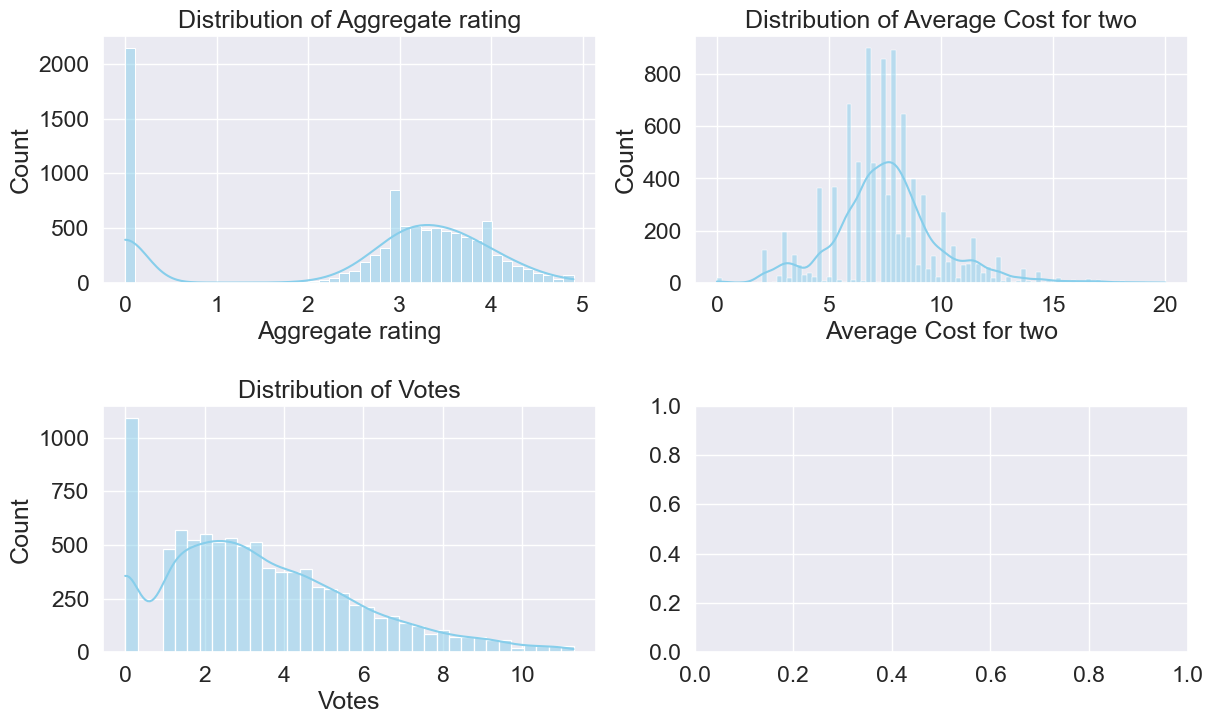

In [97]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
for ax, column in zip(axs.flat, skew_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='skyblue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [98]:
# Separating the independent and target variables into x and y 
x = df.drop(['Average Cost for two'], axis=1)
y = df['Average Cost for two']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

Feature Dimension = (9362, 157)
Label Dimension = (9362,)


,Country Code,City,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,...,Continental,North Indian,World Cuisine,Parsi,Hawaiian,American,European,Cafe,Argentine,Greek
0,1,1,4,0,0,0,3,3.9,2,5.192494,...,0,1,0,0,0,0,0,0,0,0
1,1,1,4,0,0,0,2,3.5,2,4.140818,...,0,1,0,0,0,0,0,0,0,0
2,1,1,4,0,0,0,2,3.6,2,4.546836,...,0,1,0,0,0,0,0,0,0,0
3,1,1,4,0,0,0,2,4.0,5,4.431048,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,0,0,0,3,4.2,5,5.614672,...,0,1,0,0,0,0,0,0,0,0


0     9.472682
1     8.879040
2     7.937005
3     7.368063
4    10.000000
Name: Average Cost for two, dtype: float64

In [99]:
# Separating the independent and target variables into x and y 
x2 = df.drop(['Price range'], axis=1)
y2 = df['Price range']

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

Feature Dimension = (9362, 157)
Label Dimension = (9362,)


,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes,...,Continental,North Indian,World Cuisine,Parsi,Hawaiian,American,European,Cafe,Argentine,Greek
0,1,1,9.472682,4,0,0,0,3.9,2,5.192494,...,0,1,0,0,0,0,0,0,0,0
1,1,1,8.879040,4,0,0,0,3.5,2,4.140818,...,0,1,0,0,0,0,0,0,0,0
2,1,1,7.937005,4,0,0,0,3.6,2,4.546836,...,0,1,0,0,0,0,0,0,0,0
3,1,1,7.368063,4,0,0,0,4.0,5,4.431048,...,0,0,0,0,0,0,0,0,0,0
4,1,1,10.000000,4,0,0,0,4.2,5,5.614672,...,0,1,0,0,0,0,0,0,0,0


array([3, 2, 4, 1], dtype=int64)

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for regression model 1 to predict Average Cost for two {'*'*30}")
display(x.head())



****************************** x features for regression model 1 to predict Average Cost for two ******************************


,Country Code,City,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,...,Continental,North Indian,World Cuisine,Parsi,Hawaiian,American,European,Cafe,Argentine,Greek
0,-0.302542,-3.352813,0.023374,-0.364131,-0.586149,-0.060373,1.359625,0.835330,0.144144,0.716269,...,-0.281192,1.186037,-0.020675,-0.025324,-0.027354,-0.205404,-0.117736,-0.278751,-0.014618,-0.04006
1,-0.302542,-3.352813,0.023374,-0.364131,-0.586149,-0.060373,0.242671,0.571176,0.144144,0.285306,...,-0.281192,1.186037,-0.020675,-0.025324,-0.027354,-0.205404,-0.117736,-0.278751,-0.014618,-0.04006
2,-0.302542,-3.352813,0.023374,-0.364131,-0.586149,-0.060373,0.242671,0.637214,0.144144,0.451687,...,-0.281192,1.186037,-0.020675,-0.025324,-0.027354,-0.205404,-0.117736,-0.278751,-0.014618,-0.04006
3,-0.302542,-3.352813,0.023374,-0.364131,-0.586149,-0.060373,0.242671,0.901369,1.932324,0.404239,...,-0.281192,-0.843144,-0.020675,-0.025324,-0.027354,-0.205404,-0.117736,-0.278751,-0.014618,-0.04006
4,-0.302542,-3.352813,0.023374,-0.364131,-0.586149,-0.060373,1.359625,1.033446,1.932324,0.889272,...,-0.281192,1.186037,-0.020675,-0.025324,-0.027354,-0.205404,-0.117736,-0.278751,-0.014618,-0.04006


In [101]:
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

print(f"\n\n{'*'*30} x2 features for regression model 2 to predict Price range {'*'*30}")
display(x2.head())



****************************** x2 features for regression model 2 to predict Price range ******************************


,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes,...,Continental,North Indian,World Cuisine,Parsi,Hawaiian,American,European,Cafe,Argentine,Greek
0,-0.302542,-3.352813,0.797987,0.023374,-0.364131,-0.586149,-0.060373,0.835330,0.144144,0.716269,...,-0.281192,1.186037,-0.020675,-0.025324,-0.027354,-0.205404,-0.117736,-0.278751,-0.014618,-0.04006
1,-0.302542,-3.352813,0.546081,0.023374,-0.364131,-0.586149,-0.060373,0.571176,0.144144,0.285306,...,-0.281192,1.186037,-0.020675,-0.025324,-0.027354,-0.205404,-0.117736,-0.278751,-0.014618,-0.04006
2,-0.302542,-3.352813,0.146339,0.023374,-0.364131,-0.586149,-0.060373,0.637214,0.144144,0.451687,...,-0.281192,1.186037,-0.020675,-0.025324,-0.027354,-0.205404,-0.117736,-0.278751,-0.014618,-0.04006
3,-0.302542,-3.352813,-0.095085,0.023374,-0.364131,-0.586149,-0.060373,0.901369,1.932324,0.404239,...,-0.281192,-0.843144,-0.020675,-0.025324,-0.027354,-0.205404,-0.117736,-0.278751,-0.014618,-0.04006
4,-0.302542,-3.352813,1.021749,0.023374,-0.364131,-0.586149,-0.060373,1.033446,1.932324,0.889272,...,-0.281192,1.186037,-0.020675,-0.025324,-0.027354,-0.205404,-0.117736,-0.278751,-0.014618,-0.04006


In [102]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
29,Malaysian,32.258702
21,Malay,31.939685
17,Indian,14.548779
148,North Indian,12.927453
101,African,4.449812
...,...,...
84,Canadian,1.002665
139,Oriya,1.002388
107,Cuisine Varies,1.001336
46,Peranakan,NaN


VIF values greater than 10 suggest a high correlation among these features. To address this issue, we will begin by dropping one of the columns. If the multicollinearity persists, we will then consider removing the column with the highest VIF.

In [103]:
# Saving a backup of x
x_backup = x.copy()

In [104]:
# Dropping the columns with multicollinearity
x = x.drop(['Malay', 'Indian'], axis=1) 

We drop the 'Malay' and 'Indian' columns to solve the multicollinearity problem since the first one was the second with higher VIF value, then the feature remaining highest VIF value.

In [105]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
99,African,4.449075
70,Australian,4.249540
52,Modern Australian,4.096076
9,Votes,3.617586
24,Turkish Pizza,3.513432
...,...,...
82,Canadian,1.002642
137,Oriya,1.002271
105,Cuisine Varies,1.001290
44,Peranakan,NaN


In [106]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
29,Malaysian,32.262125
21,Malay,31.944826
17,Indian,14.557890
148,North Indian,12.946077
101,African,4.445240
...,...,...
84,Canadian,1.003170
139,Oriya,1.002396
107,Cuisine Varies,1.001274
46,Peranakan,NaN


In [107]:
# Saving a backup of x
x2_backup = x2.copy()

In [108]:
# Dropping the columns with multicollinearity
x2 = x2.drop(['Malay', 'Indian'] , axis=1) 

In [109]:
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
99,African,4.444496
70,Australian,4.258102
52,Modern Australian,4.094455
9,Votes,3.629189
24,Turkish Pizza,3.512212
...,...,...
82,Canadian,1.003138
137,Oriya,1.002283
105,Cuisine Varies,1.001229
44,Peranakan,NaN


Dropping the 'Malay' and 'Indian' columns solved the multicollinearity issue. We can now move ahead with model building.

The dataset was imbalance. So, we are going to apply SMOTE for oversampling the data.

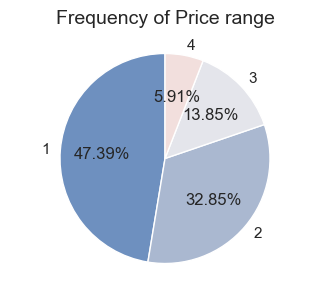

In [110]:
# Count the frequencies of target
target_counts = y2.value_counts()

# Create a pie plot
sns.set(font_scale=1)
sns.set_palette('vlag')
plt.figure(figsize=(4, 3))
plt.pie(target_counts, labels=['1','2','3', '4'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of Price range", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [111]:
x2.shape

(9362, 155)

In [112]:
target_counts

1    4437
2    3075
3    1297
4     553
Name: Price range, dtype: int64

After data processing, the dataset remains imbalanced, as depicted in the plot above.

In [113]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(x2, y2)

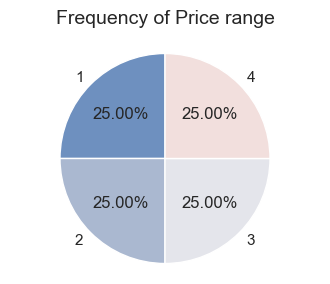

In [114]:
# Count the frequencies of target
target_counts = Y.value_counts()

# Create a pie plot
plt.figure(figsize=(4, 3))
plt.pie(target_counts, labels=['1','2','3', '4'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of Price range", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [115]:
X.shape

(17748, 155)

In [116]:
#Finding the best random state

In [117]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

In [118]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [119]:
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0 at random_state 0


In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)


x_train shape:  (6553, 155)
x_test shape:   (2809, 155)
y_train shape:  (6553,)
y_test shape:   (2809,)


In [121]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [122]:
eval_model

,id,Model,RMSE,R2_Score(test),CV_Mean


In [123]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

LR coef_        : [-1.38696944e+00 -8.83155996e-03  2.56110840e-01  3.55722017e-01
  6.56467259e-02  1.15415018e-02  1.40630226e+00  1.66109350e-02
 -1.70116166e-02  1.22779562e-01  1.36653169e-01 -3.26617907e-02
  8.98715974e-03  9.15045446e-02 -1.80248867e-02  4.05977592e-02
 -1.16397490e-02  3.07382048e-02  9.20213566e-03 -3.91124116e-03
 -6.02731152e-02 -1.26959557e-02 -7.11054950e-04  3.64236430e-03
  1.11517621e-02 -6.22150436e-02  4.45719382e-02  2.93372397e-02
  2.40654232e-02  6.67688246e-02 -1.50624977e+11 -1.12868548e-03
 -5.02717832e-02 -8.75246849e-03 -5.99410618e-02 -4.62793506e-03
 -8.59061722e-03 -1.05350010e-03 -5.30287866e-03 -1.86009281e-01
 -6.02343691e-02  4.20413851e-02 -5.50051404e-02  1.12909771e-02
 -1.79881544e+11  2.18154234e-02  1.12040525e-02 -2.13004507e+11
 -5.12515034e+11 -9.23438705e-03  3.87476618e+11 -4.54114039e-03
 -2.77015834e-02 -3.24757763e-02 -5.55802491e-02  3.39498066e+11
  2.13610108e-02  8.11434287e-03  1.69849009e+12 -5.92495436e-03
 -6.876

In [124]:
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=0)

In [125]:
random_search.best_estimator_

RandomForestRegressor(max_depth=90, min_samples_split=4, n_estimators=30)

In [126]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model = eval_model.append(model_scores, ignore_index=True)

Best parameters : {'n_estimators': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 90, 'bootstrap': True}
Best score : 0.9074348576925179
Best Estimator:  RandomForestRegressor(max_depth=90, min_samples_split=4, n_estimators=30)
********** E R R O R **********
Mean squared error: 0.4923
Root Mean squared error: 0.7017
Cross-validation results (R2): 0.9074348576925179
Average R2: 0.9074
R2_Score(test): 0.9066


In [127]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.7803
Root Mean squared error: 0.8833
Cross-validation results (R2): [ 0.6728808   0.80763311  0.75289513  0.81712982 -1.52328443]
Average R2: 0.3055
R2_Score(test): 0.8519


In [128]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 1.5842
Root Mean squared error: 1.2586
Cross-validation results (R2): [ 0.52655465  0.72371466  0.71424848  0.71022871 -1.21556071]
Average R2: 0.2918
R2_Score(test): 0.6994


In [129]:
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.5244
Root Mean squared error: 0.7241
Cross-validation results (R2): [ 0.80749546  0.87905118  0.84770768  0.87867059 -1.21834966]
Average R2: 0.4389
R2_Score(test): 0.9005


In [130]:
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 3.6625
Root Mean squared error: 1.9138
Cross-validation results (R2): [ 0.12040915  0.26356762  0.37763406  0.22848316 -0.66809351]
Average R2: 0.0644
R2_Score(test): 0.3050


In [131]:
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 0.9334
Root Mean squared error: 0.9661
Cross-validation results (R2): [ 0.80521298  0.85007526  0.82981726  0.82796699 -1.21645033]
Average R2: 0.4193
R2_Score(test): 0.8229


In [132]:
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 1.3236
Root Mean squared error: 1.1505
Cross-validation results (R2): [ 0.60174159  0.73835531  0.78986901  0.75946657 -1.32790297]
Average R2: 0.3123
R2_Score(test): 0.7488


In [133]:
# Calculate the difference between R2 score and cross-validation score 
eval_model['Dif_R2_CVmean'] = eval_model['R2_Score(test)'] - eval_model['CV_Mean']

# Presenting the results ordered
eval_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

,id,Model,RMSE,R2_Score(test),CV_Mean,Dif_R2_CVmean
1,Random Forest Regressor,"(DecisionTreeRegressor(max_depth=90, max_featu...",7.016740e-01,9.065692e-01,9.074349e-01,-8.656174e-04
4,Gradient Boosting Regressor,([DecisionTreeRegressor(criterion='friedman_ms...,7.241361e-01,9.004916e-01,4.389150e-01,4.615766e-01
6,Ridge,Ridge(),9.661436e-01,8.228658e-01,4.193244e-01,4.035413e-01
7,SVR,SVR(),1.150459e+00,7.488335e-01,3.123059e-01,4.365276e-01
2,Decision Tree Regressor,DecisionTreeRegressor(random_state=0),8.833452e-01,8.519256e-01,3.054509e-01,5.464747e-01
3,K Neighbors Regressor,KNeighborsRegressor(),1.258642e+00,6.993763e-01,2.918372e-01,4.075391e-01
5,Lasso,Lasso(),1.913754e+00,3.049893e-01,6.440010e-02,2.405892e-01
0,LinearRegression,LinearRegression(),3.547523e+12,-2.388194e+24,-4.563921e+26,4.540039e+26


In [134]:
# Calculate the difference between R2 score and cross-validation score 
eval_model['Dif_R2_CVmean'] = eval_model['R2_Score(test)'] - eval_model['CV_Mean']

# Presenting the results ordered
eval_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

,id,Model,RMSE,R2_Score(test),CV_Mean,Dif_R2_CVmean
1,Random Forest Regressor,"(DecisionTreeRegressor(max_depth=90, max_featu...",7.016740e-01,9.065692e-01,9.074349e-01,-8.656174e-04
4,Gradient Boosting Regressor,([DecisionTreeRegressor(criterion='friedman_ms...,7.241361e-01,9.004916e-01,4.389150e-01,4.615766e-01
6,Ridge,Ridge(),9.661436e-01,8.228658e-01,4.193244e-01,4.035413e-01
7,SVR,SVR(),1.150459e+00,7.488335e-01,3.123059e-01,4.365276e-01
2,Decision Tree Regressor,DecisionTreeRegressor(random_state=0),8.833452e-01,8.519256e-01,3.054509e-01,5.464747e-01
3,K Neighbors Regressor,KNeighborsRegressor(),1.258642e+00,6.993763e-01,2.918372e-01,4.075391e-01
5,Lasso,Lasso(),1.913754e+00,3.049893e-01,6.440010e-02,2.405892e-01
0,LinearRegression,LinearRegression(),3.547523e+12,-2.388194e+24,-4.563921e+26,4.540039e+26


This consistency is a positive sign, suggesting that the model generalizes well to new data.

In order to apply Hyper Parameter tunning we are going to select Random Forest Regressor as our final model.

In [135]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [136]:
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=0, scoring='neg_mean_squared_error')

In [137]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 90,
 'bootstrap': True}

In [138]:
best_model

RandomForestRegressor(max_depth=90, min_samples_split=4, n_estimators=30)

In [139]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=70, min_samples_split=9, n_estimators=30)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 90.79%


In [200]:

# Prediction
prediction = best_model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)

# Since we transformed the target variable with the cube-root transform method
df_result['Predicted_final'] = np.power(prediction,3)
df_result['Original_final'] = np.power(np.array(y_test),3)

df_result.T

Maximum R2 score: 98.143 %


,0,1,2,3,4,5,6,7,8,9,...,5315,5316,5317,5318,5319,5320,5321,5322,5323,5324
Predicted,3,2,2,4,4,1,4,1,3,3,...,3,4,3,3,4,1,4,1,3,2
Original,3,2,2,4,4,1,4,1,3,3,...,3,4,3,3,4,1,4,1,3,3
Predicted_final,27,8,8,64,64,1,64,1,27,27,...,27,64,27,27,64,1,64,1,27,8
Original_final,27,8,8,64,64,1,64,1,27,27,...,27,64,27,27,64,1,64,1,27,27


#These are the predicted values in a dataset to compared the prediction with the test data with R2 score 98.143 %.

Since we transformed the 'Average Costo for two' target variable with the cube-root transform method, we need to reverse the transformation with the predicted values, stored in Predicted_final.

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [146]:
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.979 at random_state 143


In [147]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (12423, 155)
x_test shape:   (5325, 155)
y_train shape:  (12423,)
y_test shape:   (5325,)


In [148]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [149]:
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [150]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}

In [151]:
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[1320   12    1    0]
 [   8 1292   30    1]
 [   0   20 1269   32]
 [   0    0   11 1329]]
Classification report: 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1333
           2       0.98      0.97      0.97      1331
           3       0.97      0.96      0.96      1321
           4       0.98      0.99      0.98      1340

    accuracy                           0.98      5325
   macro avg       0.98      0.98      0.98      5325
weighted avg       0.98      0.98      0.98      5325

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 97.84%


In [152]:
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[1264   65    4    0]
 [  41 1231   55    4]
 [   2   29 1268   22]
 [   0    0    1 1339]]
Classification report: 
               precision    recall  f1-score   support

           1       0.97      0.95      0.96      1333
           2       0.93      0.92      0.93      1331
           3       0.95      0.96      0.96      1321
           4       0.98      1.00      0.99      1340

    accuracy                           0.96      5325
   macro avg       0.96      0.96      0.96      5325
weighted avg       0.96      0.96      0.96      5325

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 95.81%


In [153]:
id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[1265   68    0    0]
 [  30 1176  117    8]
 [  12   83 1064  162]
 [  15   25  147 1153]]
Classification report: 
               precision    recall  f1-score   support

           1       0.96      0.95      0.95      1333
           2       0.87      0.88      0.88      1331
           3       0.80      0.81      0.80      1321
           4       0.87      0.86      0.87      1340

    accuracy                           0.87      5325
   macro avg       0.87      0.87      0.87      5325
weighted avg       0.88      0.87      0.87      5325

Training Accuracy using LogisticRegression is 88.42%
The accuracy score using LogisticRegression is 87.47%


In [154]:
id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: SVC
Confusion matrix: 
 [[1199  125    9    0]
 [  35 1142  142   12]
 [  13   97 1108  103]
 [  11   12  115 1202]]
Classification report: 
               precision    recall  f1-score   support

           1       0.95      0.90      0.93      1333
           2       0.83      0.86      0.84      1331
           3       0.81      0.84      0.82      1321
           4       0.91      0.90      0.90      1340

    accuracy                           0.87      5325
   macro avg       0.88      0.87      0.87      5325
weighted avg       0.88      0.87      0.87      5325

Training Accuracy using SVC is 90.08%
The accuracy score using SVC is 87.34%


In [155]:
id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[1331    0    2    0]
 [  16 1293   19    3]
 [   0   47 1215   59]
 [   0    0   58 1282]]
Classification report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1333
           2       0.96      0.97      0.97      1331
           3       0.94      0.92      0.93      1321
           4       0.95      0.96      0.96      1340

    accuracy                           0.96      5325
   macro avg       0.96      0.96      0.96      5325
weighted avg       0.96      0.96      0.96      5325

Training Accuracy using GradientBoostingClassifier is 96.81%
The accuracy score using GradientBoostingClassifier is 96.17%


In [156]:

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[1333    0    0    0]
 [  28 1286   14    3]
 [   0  111 1193   17]
 [   0   17 1243   80]]
Classification report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      1333
           2       0.91      0.97      0.94      1331
           3       0.49      0.90      0.63      1321
           4       0.80      0.06      0.11      1340

    accuracy                           0.73      5325
   macro avg       0.79      0.73      0.67      5325
weighted avg       0.79      0.73      0.67      5325

Training Accuracy using AdaBoostClassifier is 72.79%
The accuracy score using AdaBoostClassifier is 73.09%


In [157]:
id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[1331    2    0    0]
 [  10 1299   20    2]
 [   0   26 1260   35]
 [   0    1   45 1294]]
Classification report: 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1333
           2       0.98      0.98      0.98      1331
           3       0.95      0.95      0.95      1321
           4       0.97      0.97      0.97      1340

    accuracy                           0.97      5325
   macro avg       0.97      0.97      0.97      5325
weighted avg       0.97      0.97      0.97      5325

Training Accuracy using BaggingClassifier is 99.76%
The accuracy score using BaggingClassifier is 97.35%


In [158]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)


,id,Model,Training Accuracy,Model Accuracy Score
0,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.978404
6,BaggingClassifier,(DecisionTreeClassifier(random_state=249241778...,0.997585,0.973521
4,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.968124,0.961690
1,ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1020345395),...",1.000000,0.958122
2,LogisticRegression,LogisticRegression(),0.884247,0.874742
3,SVC,SVC(),0.900829,0.873427
5,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.727924,0.730892


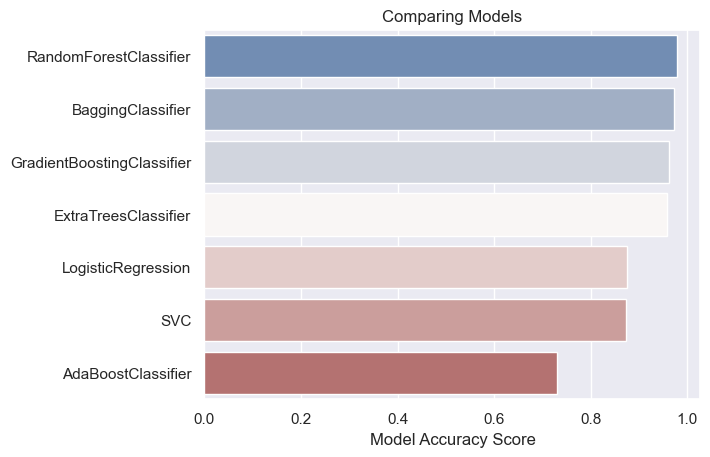

In [159]:
sns.barplot(y= 'id', x= 'Model Accuracy Score', data= df_model_accuracy, palette='vlag')
plt.title('Comparing Models')
plt.xlabel('Model Accuracy Score')
plt.ylabel('');

In [160]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [161]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)

In [162]:
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff


::: Model: RandomForestClassifier::: 
score:[0.88929577 0.96450704 0.98591549 0.92673993 0.93378416]
Score mean: 0.9400
Difference between Accuracy score and cross validation score is 0.0384

::: Model: ExtraTreesClassifier::: 
score:[0.85690141 0.94169014 0.96056338 0.91631445 0.92617639]
Score mean: 0.9203
Difference between Accuracy score and cross validation score is 0.0378

::: Model: LogisticRegression::: 
score:[0.84422535 0.86394366 0.89690141 0.844745   0.84615385]
Score mean: 0.8592
Difference between Accuracy score and cross validation score is 0.0155

::: Model: SVC::: 
score:[0.84366197 0.87971831 0.90253521 0.84559031 0.86249648]
Score mean: 0.8668
Difference between Accuracy score and cross validation score is 0.0066

::: Model: GradientBoostingClassifier::: 
score:[0.88225352 0.9543662  0.96816901 0.93293886 0.91434207]
Score mean: 0.9304
Difference between Accuracy score and cross validation score is 0.0313

::: Model: AdaBoostClassifier::: 
score:[0.80112676 0.734647

In [163]:
# Present the metrics to eval the best model
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])

,Model,Training Accuracy,Model Accuracy Score,CV score mean,Diff Acc and cv score
id,,,,,
RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",1.000000,0.978404,0.940048,0.038355
BaggingClassifier,(DecisionTreeClassifier(random_state=249241778...,0.997585,0.973521,0.924444,0.049077
GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.968124,0.961690,0.930414,0.031276
ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1020345395),...",1.000000,0.958122,0.920329,0.037793
LogisticRegression,LogisticRegression(),0.884247,0.874742,0.859194,0.015548
SVC,SVC(),0.900829,0.873427,0.866800,0.006627
AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.727924,0.730892,0.702436,0.028456


In [164]:
random_state

143

In [165]:
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [166]:
np.arange(25, 310, 5)

array([ 25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,
        90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150,
       155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215,
       220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280,
       285, 290, 295, 300, 305])

In [167]:
# RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
             'n_estimators': np.arange(100, 305, 5),  # 1.Vary the number of trees default 100
             'max_features': ['sqrt', 'log2', None], # 2. default 'sqrt'
             'max_depth': [None] + list(np.arange(80, 110, 10)),  # 3.maximum depth of trees default None 
             'max_leaf_nodes': [9, 12, 30], # 4. Restrics the grow of each tree default None,
             'min_samples_split': np.arange(2, 5),  # 6.minimum samples required to split default=2
    
#              'criterion':['gini','entropy'],
#              'random_state': [random_state, 50, 500, 1000],
#              'n_jobs': [-1, 1]
             }

# Build the model 
model = RandomForestClassifier()


In [168]:
# Perform search with cross validation
# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, 
                                   n_iter=10, scoring='accuracy', cv=3, 
                                   random_state=random_state, n_jobs=-1)
# Fit the model 
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 80, 90, 100],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [9, 12, 30],
                                        'min_samples_split': array([2, 3, 4]),
                                        'n_estimators': array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290,
       295, 300])},
                   random_state=143, scoring='accuracy')

In [169]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model_ht = random_search.best_estimator_

print("Best Parameters for RandomForestClassifier model:")
display(best_params)

Best Parameters for RandomForestClassifier model:


{'n_estimators': 240,
 'min_samples_split': 4,
 'max_leaf_nodes': 30,
 'max_features': None,
 'max_depth': 80}

In [170]:
best_model_ht

RandomForestClassifier(max_depth=80, max_features=None, max_leaf_nodes=30,
                       min_samples_split=4, n_estimators=240)

In [171]:
# Create the model with the best parameters
best_model = RandomForestClassifier (
                                   max_depth = None,
                                   max_features = None,
                                   max_leaf_nodes = 30, 
                                   min_samples_split = 2,
                                   n_estimators = 265,
)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 95.19%


Above, the prediction model with the parameters we obtained as best parameters after the hyper-tunning process.

In [172]:
# Create the model with the best parameters
best_model = RandomForestClassifier (
                                   max_depth = None,
                                   max_features = 'sqrt',
                                   max_leaf_nodes = None, 
                                   min_samples_split = 2,
                                   n_estimators = 265,
)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 97.78%


In [173]:
from sklearn.multiclass import OneVsRestClassifier
# Create the classifier
classifier = OneVsRestClassifier(best_model)

# Train the model
classifier.fit(x_train, y_train)

# Get the decision function scores for each class
y_score = classifier.predict_proba(x_test)

In [189]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

target = 'Price range'
classes = best_model.classes_

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test == classes[i], y_score[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot the ROC curves
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# one color for each category
colors = ['b', 'g', 'r', 'c']

# Plot a roc curve for each category
for i, ax, color in zip(range(len(classes)), axes.flat, colors):
    class_name = classes[i]
    sns.lineplot (fpr[i], tpr[i],label='ROC curve), (area = {roc_auc[i]:0.1f})'
#     ax.set_xticks([])

# style plot
axes[1,0].set_xlabel('False Positive Rate', size=10, labelpad=8)
axes[1,1].set_xlabel('False Positive Rate', size=10, labelpad=8)

axes[0,0].set_ylabel('True Positive Rate', size=10, labelpad=8)
axes[1,0].set_ylabel('True Positive Rate', size=10, labelpad=8)

fig.suptitle('Receiver Operating Characteristic (ROC) for Best Model', fontsize=12, y=1)

plt.subplots_adjust(hspace=0.2)
plt.show()

SyntaxError: '(' was never closed (601163479.py, line 22)

Here, we are examining the Area Under the Curve (AUC) for each predicted class in our best-performing model. The AUC values for nearly all classes are either close to 1 or equal to 1, which is favorable. This indicates that the model exhibits high discriminatory capability or precision in distinguishing between different classes.

In [198]:


# Prediction
prediction = best_model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 97.784 %


,0,1,2,3,4,5,6,7,8,9,...,5315,5316,5317,5318,5319,5320,5321,5322,5323,5324
Predicted,3,2,2,4,4,1,4,1,3,3,...,3,4,3,3,4,1,4,1,3,2
Original,3,2,2,4,4,1,4,1,3,3,...,3,4,3,3,4,1,4,1,3,3


These values represent the predictions on the fraction of the dataset reserved for testing, enabling a comparison with an accuracy of  97.784 %.

The given dataset comprises 9551 rows and 22 columns; however,  Columns such as 'Restaurant ID', 'Address', and 'Switch to order menu' were dropped as they serve only for identification purposes and do not contribute value to the prediction model.

We have two target variables: 'Average Cost for Two', which is continuous, prompting the development of a regression model, and 'Price Range,' a categorical variable with four possible values, requiring the creation of a classification model."

The chosen regression model is the RandomForestRegressor, achieving a R2 score of 98.143 % for predicting 'Average Cost for Two'.

For the classification task, the RandomForestClassifier achieved an accuracy score of  97.784 % in predicting 'Price Range'.

The dataset do not present duplicates.

Handling missing values resulted in the removal of 9 rows, constituting a minimal 0.09% loss of data.

Outlier treatment involved eliminating 1.98% of the total records (189 rows). Threshold was set as 3.

To mitigate potential multicollinearity issues, two columns were dropped from both the regression and classification model datasets.